In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
drebin_all = pd.read_csv('drebin.csv')

/home/galib/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
#dataset load
drebin_apis_permissions = pd.read_csv('drebin.csv', 
                         usecols= [*range(0, 6),*range(7, 13),*range(14,19)
                                  ,21,23,24,*range(28,38),41,43,46,48,51,54,
                                   57,58,59,62,64,68,70,78,80,*range(83,87),
                                   *range(92, 95),98,101,102,104,109,123,128,
                                   140,142,145,147,148,152,155,156,158,167,
                                   171,172,180,190,215, 6,13,19,20,22,26,27,38,39,40,42,45,47,49,
                                   50,52,56,60,61,63,65,67,69,71,72,75,76,77,
                                   *range(87,92),95,99,103,105,106,108,
                                   *range(110,117), *range(119,123),*range(124,128),
                                   *range(129,135),*range(136,140),143,144,146,
                                   151,153,154,159,160,*range(162,167),168,169,170,
                                   173,175,176,177,181,182,183,184,187,188,189,
                                   191,192,193,195,196,*range(198,215)])

/home/galib/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
#dataset load
drebin_permissions = pd.read_csv('drebin.csv', 
                         usecols= [6,13,19,20,22,26,27,38,39,40,42,45,47,49,
                                   50,52,56,60,61,63,65,67,69,71,72,75,76,77,
                                   *range(87,92),95,99,103,105,106,108,
                                   *range(110,117), *range(119,123),*range(124,128),
                                   *range(129,135),*range(136,140),143,144,146,
                                   151,153,154,159,160,*range(162,167),168,169,170,
                                   173,175,176,177,181,182,183,184,187,188,189,
                                   191,192,193,195,196,*range(198,215),215])

In [15]:
drebin_all.shape

(15036, 216)

In [16]:
drebin_apis_permissions.shape

(15036, 187)

In [17]:
X_all = drebin_all.iloc[0:,0:215]  #independent columns
y_all = drebin_all.iloc[0:,-1]
X_all["TelephonyManager.getSimCountryIso"] = pd.to_numeric(X_all['TelephonyManager.getSimCountryIso'], errors='coerce').fillna(0).astype(int)

In [22]:
X_apis_permissions = drebin_apis_permissions.iloc[0:,0:186]  #independent columns
X_apis_permissions["TelephonyManager.getSimCountryIso"] = pd.to_numeric(X_apis_permissions['TelephonyManager.getSimCountryIso'], errors='coerce').fillna(0).astype(int)

In [9]:
#drebin_all.info()
X_apis = drebin_apis.iloc[0:,0:73]  #independent columns
X_apis["TelephonyManager.getSimCountryIso"] = pd.to_numeric(X_apis['TelephonyManager.getSimCountryIso'], errors='coerce').fillna(0).astype(int)

In [23]:
y_all = y_all.map(dict(S=1, B=0))

In [24]:
y_all

0        1
1        1
2        1
3        1
4        1
        ..
15031    0
15032    0
15033    0
15034    0
15035    0
Name: class, Length: 15036, dtype: int64

In [26]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_apis_permissions, y_all, test_size = 0.5, random_state = 0)


In [27]:
#mandatory import 
from sklearn.model_selection import cross_validate, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA


from sklearn.feature_selection import RFE

In [28]:
pre = []
rec = []
fs = []
acc = []
auc = []
def clear_metrics(): 
    pre.clear()
    rec.clear()
    fs.clear()
    acc.clear()
    auc.clear()

In [79]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import svm

In [86]:
import csv, os, time 
def results_to_csv(title):
    directory = "APIS_PERMISSIONS_CSV"
  
    # Parent Directory path 
    parent_dir = os.getcwd()
  
    # Path 
    path = os.path.join(parent_dir, directory) 
    if not os.path.exists('APIS_PERMISSIONS_CSV'):
        os.mkdir(path)
    os.chdir(path) 
    with open(title+ '.csv', 'w') as f:
        writer = csv.writer(f)
        writer.writerow(['Accuracy','Precision', 'Recall', 'F1','AUC'])
        writer.writerows(zip(acc, pre, rec, fs, auc))
    os.chdir('../')
        
def allscore(scores,i):
    acc.insert(i,scores['test_accuracy'].mean())
    fs.insert(i,scores['test_f1'].mean())
    pre.insert(i,scores['test_precision'].mean())
    rec.insert(i,scores['test_recall'].mean())
    auc.insert(i,scores['test_roc_auc'].mean())
    print("Accuracy: %0.4f   (+/- %0.4f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))
    print("Precision: %0.4f   (+/- %0.4f)" % (scores['test_precision'].mean(), scores['test_accuracy'].std() * 2))
    print("Recall: %0.4f   (+/- %0.4f)" % (scores['test_recall'].mean(), scores['test_accuracy'].std() * 2))
    print("F-1 Score: %0.4f   (+/- %0.4f)" % (scores['test_f1'].mean(), scores['test_accuracy'].std() * 2))
    print("ROC-AUC: %0.4f   (+/- %0.4f)" % (scores['test_roc_auc'].mean(), scores['test_accuracy'].std() * 2))
def run_randomForest(X,y, i=0):
    scoring = ['precision', 'recall', 'f1','accuracy','roc_auc']
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    scores = cross_validate(clf, X, y, cv=10, n_jobs=-1,
                        scoring=scoring, return_train_score=False)
    print('Classification Report for Random Forest:   ', i)
    allscore(scores,i)
def run_svm(X,y, i=0):
    clf = svm.SVC(gamma='auto', C=1, kernel='linear')
    clf.fit(X, y)
    
#     Pipeline(steps=[('standardscaler', StandardScaler()),
#                 ('svc', SVC(gamma='auto'))])
    scoring = ['precision', 'recall', 'f1','accuracy','roc_auc']
    scores = cross_validate(clf, X, y, cv=10, n_jobs=-1,
                        scoring=scoring, return_train_score=False)
    print('Classification Report for SVM:   ', i)
    allscore(scores,i)
def incremental_plot(i,j,title, x_axis = "Number of Features"): 
    from pylab import rcParams
    %matplotlib inline 
    rcParams['figure.figsize'] = 10,8
    sns.set_style('whitegrid')
    x = range(i,j)
    y1 = pre
    y2 = rec
    y3 = acc
    y4 = fs

    fig = plt.figure()
    ax = plt.subplot(111)
    #savefig('f.png', bbox_inches='tight')
    plt.title(title)
    plt.xlabel(x_axis)
    plt.ylabel("Performance Metrics")
    ax.plot(x,y1, mew = 1, label='Precision') #mew = marker width
    ax.plot(x,y2,  mew = 1, label='Recall') #mew = marker width
    ax.plot(x,y3,  mew = 1, label='Accuracy') #mew = marker width
    ax.plot(x,y4, mew = 1, label='F-1 Score') #mew = marker width
    ax.legend(loc='upper center', bbox_to_anchor=(1.12, 0.6), shadow=True, prop={'size': 15}, ncol=1)
    #plt.plot(x1,y1, marker = '+', mew = 10)
    directory = "APIS_PERMISSIONS_FIGURES"
  
    # Parent Directory path 
    parent_dir = os.getcwd()
  
    # Path 
    path = os.path.join(parent_dir, directory) 
    if not os.path.exists('APIS_PERMISSIONS_FIGURES'):
        os.mkdir(path)
    os.chdir(path) 
    plt.savefig(title + '.png', bbox_inches='tight', pad_inches=.1)
    os.chdir('../')
    
def incremental_plot_auc(i,j,title, x_axis = "Number of Features"): 
    from pylab import rcParams
    %matplotlib inline 
    rcParams['figure.figsize'] = 10,8
    sns.set_style('whitegrid')
    x = range(i,j)
    y1 = auc
 

    fig = plt.figure()
    ax = plt.subplot(111)
    #savefig('f.png', bbox_inches='tight')
    plt.title(title)
    plt.xlabel(x_axis)
    plt.ylabel("ROC-AUC Score")
    ax.plot(x,y1, mew = 1, label='ROC-AUC') #mew = marker width
    ax.legend(loc='upper center', bbox_to_anchor=(1.12, 0.6), shadow=True, prop={'size': 15}, ncol=1)
    #plt.plot(x1,y1, marker = '+', mew = 10)
    directory = "APIS_PERMISSIONS_FIGURES"
  
    # Parent Directory path 
    parent_dir = os.getcwd()
  
    # Path 
    path = os.path.join(parent_dir, directory) 
    if not os.path.exists('APIS_PERMISSIONS_FIGURES'):
        os.mkdir(path)
    os.chdir(path) 
    plt.savefig(title + '_AUC.png', bbox_inches='tight', pad_inches=.1)
    os.chdir('../')
    
    
    

In [30]:
def get_correlation(data, threshold):
    corr_col = set()
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j])> threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col
def grouped_correlated(X):
    corr_features = get_correlation(X, 0.85)
    #print(corr_features)
    X_uncorrelated = X.drop(labels = corr_features, axis =1)
    corrmat = X.corr()
    corrdata = corrmat.abs().stack()
    corrdata = corrdata.sort_values(ascending=False)
    corrdata = corrdata[corrdata>0.85]
    corrdata = corrdata[corrdata<1]
    corrdata = pd.DataFrame(corrdata).reset_index()
    corrdata.columns = ['features1', 'features2', 'corr_value']
    #print(corrdata)
    
   
    top_corr_features = corrmat.index
    #plt.figure(figsize=(24,24))
    #plot heat map
    #g=sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")
    bottom, top = g.get_ylim()
    g.set_ylim(bottom + 0.5, top - 0.5)
    #figure = g.get_figure()    
    figure.savefig('Correlation', dpi=400, bbox_inches='tight', pad_inches=.1)
    grouped_feature_list = []
    correlated_groups_list = []
    for feature in corrdata.features1.unique():
        if feature not in grouped_feature_list:
            correlated_block = corrdata[corrdata.features1 == feature]
            grouped_feature_list = grouped_feature_list + list(correlated_block.features2.unique()) + [feature]
            correlated_groups_list.append(correlated_block)
    #Feature Importance based on tree based classifiers 

    important_features = []
    for group in correlated_groups_list:
        features = list(group.features1.unique()) + list(group.features2.unique())
        rf = RandomForestClassifier(n_estimators=100,n_jobs=-1, random_state=0)
        rf.fit(X[features], y_all)

        importance = pd.concat([pd.Series(features), pd.Series(rf.feature_importances_)], axis = 1)
        importance.columns = ['features', 'importance']
        importance.sort_values(by = 'importance', ascending = False, inplace = True)
        feat = importance.iloc[0]
        important_features.append(feat)
    important_features= pd.DataFrame(important_features)
    important_features.reset_index(inplace=True, drop = True)
    important_features
    features_to_consider = set(important_features['features'])
    features_to_discard = set(corr_features) - set(features_to_consider)
    features_to_discard = list(features_to_discard)
    X_grouped_correlated = X.drop(labels = features_to_discard, axis = 1)
    print (X_grouped_correlated.shape)
    return X_grouped_correlated
def to_dataframe(X):
    print(X.shape)
    X_return = pd.DataFrame(data=X,
          index=np.arange(1, X.shape[0]+1), columns=np.arange(1, X.shape[1]+1))
    
    return X_return

## Feature Importance using SelectKBest, chi2, f-score

In [31]:
#apply SelectKBest class to extract top 10 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train,y_train)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns

In [32]:
clear_metrics()
#X_top_feat_imps
for index in range(1,188,1):
    top_permissions_indexes = []
    top_permissions_indexes = featureScores.Score.nlargest(index).index
    X_top_feat_imps = X_validate.iloc[0:,top_permissions_indexes]
    print(X_top_feat_imps.shape)
    run_randomForest(X_top_feat_imps,y_validate, index)

(7518, 1)
Classification Report for Random Forest:    1
Accuracy: 0.7998   (+/- 0.0216)
Precision: 0.8424   (+/- 0.0216)
Recall: 0.5496   (+/- 0.0216)
F-1 Score: 0.6648   (+/- 0.0216)
ROC-AUC: 0.7456   (+/- 0.0216)
(7518, 2)
Classification Report for Random Forest:    2
Accuracy: 0.8198   (+/- 0.0164)
Precision: 0.9695   (+/- 0.0164)
Recall: 0.5184   (+/- 0.0164)
F-1 Score: 0.6750   (+/- 0.0164)
ROC-AUC: 0.8902   (+/- 0.0164)
(7518, 3)
Classification Report for Random Forest:    3
Accuracy: 0.8264   (+/- 0.0156)
Precision: 0.9732   (+/- 0.0156)
Recall: 0.5353   (+/- 0.0156)
F-1 Score: 0.6901   (+/- 0.0156)
ROC-AUC: 0.9005   (+/- 0.0156)
(7518, 4)
Classification Report for Random Forest:    4
Accuracy: 0.8258   (+/- 0.0158)
Precision: 0.9701   (+/- 0.0158)
Recall: 0.5353   (+/- 0.0158)
F-1 Score: 0.6893   (+/- 0.0158)
ROC-AUC: 0.9008   (+/- 0.0158)
(7518, 5)
Classification Report for Random Forest:    5
Accuracy: 0.8254   (+/- 0.0160)
Precision: 0.9680   (+/- 0.0160)
Recall: 0.5353   (+

Classification Report for Random Forest:    39
Accuracy: 0.9613   (+/- 0.0102)
Precision: 0.9564   (+/- 0.0102)
Recall: 0.9360   (+/- 0.0102)
F-1 Score: 0.9459   (+/- 0.0102)
ROC-AUC: 0.9905   (+/- 0.0102)
(7518, 40)
Classification Report for Random Forest:    40
Accuracy: 0.9609   (+/- 0.0115)
Precision: 0.9561   (+/- 0.0115)
Recall: 0.9353   (+/- 0.0115)
F-1 Score: 0.9453   (+/- 0.0115)
ROC-AUC: 0.9907   (+/- 0.0115)
(7518, 41)
Classification Report for Random Forest:    41
Accuracy: 0.9622   (+/- 0.0117)
Precision: 0.9582   (+/- 0.0117)
Recall: 0.9368   (+/- 0.0117)
F-1 Score: 0.9472   (+/- 0.0117)
ROC-AUC: 0.9912   (+/- 0.0117)
(7518, 42)
Classification Report for Random Forest:    42
Accuracy: 0.9617   (+/- 0.0131)
Precision: 0.9581   (+/- 0.0131)
Recall: 0.9353   (+/- 0.0131)
F-1 Score: 0.9464   (+/- 0.0131)
ROC-AUC: 0.9914   (+/- 0.0131)
(7518, 43)
Classification Report for Random Forest:    43
Accuracy: 0.9622   (+/- 0.0124)
Precision: 0.9575   (+/- 0.0124)
Recall: 0.9375   (+/

Classification Report for Random Forest:    77
Accuracy: 0.9773   (+/- 0.0099)
Precision: 0.9805   (+/- 0.0099)
Recall: 0.9562   (+/- 0.0099)
F-1 Score: 0.9681   (+/- 0.0099)
ROC-AUC: 0.9950   (+/- 0.0099)
(7518, 78)
Classification Report for Random Forest:    78
Accuracy: 0.9766   (+/- 0.0113)
Precision: 0.9787   (+/- 0.0113)
Recall: 0.9562   (+/- 0.0113)
F-1 Score: 0.9673   (+/- 0.0113)
ROC-AUC: 0.9950   (+/- 0.0113)
(7518, 79)
Classification Report for Random Forest:    79
Accuracy: 0.9765   (+/- 0.0106)
Precision: 0.9791   (+/- 0.0106)
Recall: 0.9555   (+/- 0.0106)
F-1 Score: 0.9670   (+/- 0.0106)
ROC-AUC: 0.9949   (+/- 0.0106)
(7518, 80)
Classification Report for Random Forest:    80
Accuracy: 0.9761   (+/- 0.0091)
Precision: 0.9790   (+/- 0.0091)
Recall: 0.9544   (+/- 0.0091)
F-1 Score: 0.9665   (+/- 0.0091)
ROC-AUC: 0.9954   (+/- 0.0091)
(7518, 81)
Classification Report for Random Forest:    81
Accuracy: 0.9767   (+/- 0.0092)
Precision: 0.9791   (+/- 0.0092)
Recall: 0.9562   (+/

Classification Report for Random Forest:    115
Accuracy: 0.9807   (+/- 0.0088)
Precision: 0.9854   (+/- 0.0088)
Recall: 0.9610   (+/- 0.0088)
F-1 Score: 0.9730   (+/- 0.0088)
ROC-AUC: 0.9963   (+/- 0.0088)
(7518, 116)
Classification Report for Random Forest:    116
Accuracy: 0.9796   (+/- 0.0094)
Precision: 0.9843   (+/- 0.0094)
Recall: 0.9592   (+/- 0.0094)
F-1 Score: 0.9715   (+/- 0.0094)
ROC-AUC: 0.9963   (+/- 0.0094)
(7518, 117)
Classification Report for Random Forest:    117
Accuracy: 0.9799   (+/- 0.0079)
Precision: 0.9843   (+/- 0.0079)
Recall: 0.9599   (+/- 0.0079)
F-1 Score: 0.9719   (+/- 0.0079)
ROC-AUC: 0.9960   (+/- 0.0079)
(7518, 118)
Classification Report for Random Forest:    118
Accuracy: 0.9802   (+/- 0.0100)
Precision: 0.9836   (+/- 0.0100)
Recall: 0.9614   (+/- 0.0100)
F-1 Score: 0.9723   (+/- 0.0100)
ROC-AUC: 0.9964   (+/- 0.0100)
(7518, 119)
Classification Report for Random Forest:    119
Accuracy: 0.9803   (+/- 0.0092)
Precision: 0.9847   (+/- 0.0092)
Recall: 0.9

Classification Report for Random Forest:    153
Accuracy: 0.9826   (+/- 0.0103)
Precision: 0.9891   (+/- 0.0103)
Recall: 0.9625   (+/- 0.0103)
F-1 Score: 0.9755   (+/- 0.0103)
ROC-AUC: 0.9969   (+/- 0.0103)
(7518, 154)
Classification Report for Random Forest:    154
Accuracy: 0.9812   (+/- 0.0081)
Precision: 0.9865   (+/- 0.0081)
Recall: 0.9614   (+/- 0.0081)
F-1 Score: 0.9737   (+/- 0.0081)
ROC-AUC: 0.9968   (+/- 0.0081)
(7518, 155)
Classification Report for Random Forest:    155
Accuracy: 0.9812   (+/- 0.0105)
Precision: 0.9862   (+/- 0.0105)
Recall: 0.9618   (+/- 0.0105)
F-1 Score: 0.9737   (+/- 0.0105)
ROC-AUC: 0.9970   (+/- 0.0105)
(7518, 156)
Classification Report for Random Forest:    156
Accuracy: 0.9815   (+/- 0.0095)
Precision: 0.9877   (+/- 0.0095)
Recall: 0.9610   (+/- 0.0095)
F-1 Score: 0.9741   (+/- 0.0095)
ROC-AUC: 0.9967   (+/- 0.0095)
(7518, 157)
Classification Report for Random Forest:    157
Accuracy: 0.9815   (+/- 0.0105)
Precision: 0.9876   (+/- 0.0105)
Recall: 0.9

In [33]:
title = "Feature Selection using SelectKBest(Chi-Square Test)"
results_to_csv(title)

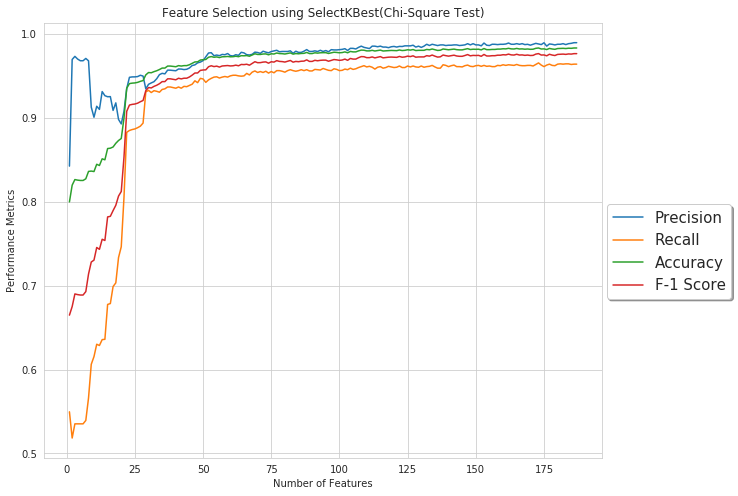

In [34]:
incremental_plot(1,188,title)

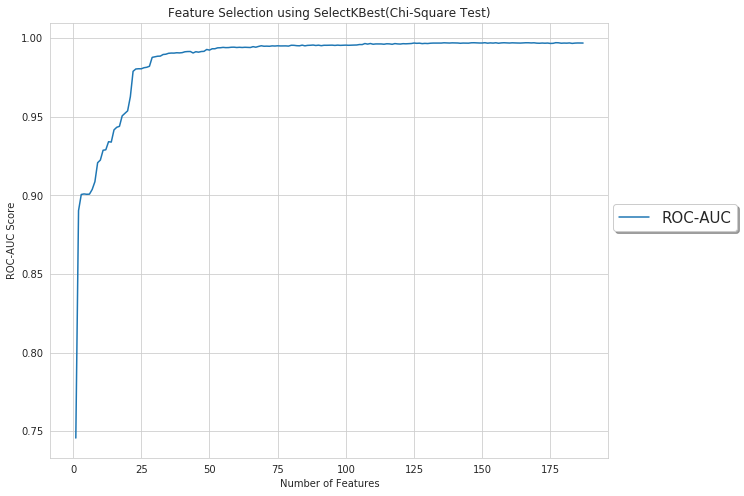

In [35]:
incremental_plot_auc(1,188,title)

In [37]:
#apply SelectKBest class to extract top 10 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X_train,y_train)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns

In [64]:
featureScores.Score.nlargest(5).index

Int64Index([0, 1, 3, 2, 4], dtype='int64')

In [38]:
clear_metrics()
#X_top_feat_imps
for index in range(1,188,1):
    top_permissions_indexes = []
    top_permissions_indexes = featureScores.Score.nlargest(index).index
    X_top_feat_imps = X_validate.iloc[0:,top_permissions_indexes]
    print(X_top_feat_imps.shape)
    run_randomForest(X_top_feat_imps,y_validate, index)

(7518, 1)
Classification Report for Random Forest:    1
Accuracy: 0.7479   (+/- 0.0282)
Precision: 0.5997   (+/- 0.0282)
Recall: 0.9140   (+/- 0.0282)
F-1 Score: 0.7241   (+/- 0.0282)
ROC-AUC: 0.7839   (+/- 0.0282)
(7518, 2)
Classification Report for Random Forest:    2
Accuracy: 0.7682   (+/- 0.0349)
Precision: 0.6265   (+/- 0.0349)
Recall: 0.8915   (+/- 0.0349)
F-1 Score: 0.7357   (+/- 0.0349)
ROC-AUC: 0.8164   (+/- 0.0349)
(7518, 3)
Classification Report for Random Forest:    3
Accuracy: 0.7695   (+/- 0.0334)
Precision: 0.6281   (+/- 0.0334)
Recall: 0.8915   (+/- 0.0334)
F-1 Score: 0.7368   (+/- 0.0334)
ROC-AUC: 0.8178   (+/- 0.0334)
(7518, 4)
Classification Report for Random Forest:    4
Accuracy: 0.7691   (+/- 0.0326)
Precision: 0.6276   (+/- 0.0326)
Recall: 0.8915   (+/- 0.0326)
F-1 Score: 0.7365   (+/- 0.0326)
ROC-AUC: 0.8178   (+/- 0.0326)
(7518, 5)
Classification Report for Random Forest:    5
Accuracy: 0.7752   (+/- 0.0419)
Precision: 0.6395   (+/- 0.0419)
Recall: 0.8706   (+

Classification Report for Random Forest:    39
Accuracy: 0.9644   (+/- 0.0109)
Precision: 0.9663   (+/- 0.0109)
Recall: 0.9342   (+/- 0.0109)
F-1 Score: 0.9498   (+/- 0.0109)
ROC-AUC: 0.9920   (+/- 0.0109)
(7518, 40)
Classification Report for Random Forest:    40
Accuracy: 0.9670   (+/- 0.0104)
Precision: 0.9683   (+/- 0.0104)
Recall: 0.9397   (+/- 0.0104)
F-1 Score: 0.9537   (+/- 0.0104)
ROC-AUC: 0.9924   (+/- 0.0104)
(7518, 41)
Classification Report for Random Forest:    41
Accuracy: 0.9673   (+/- 0.0095)
Precision: 0.9698   (+/- 0.0095)
Recall: 0.9390   (+/- 0.0095)
F-1 Score: 0.9540   (+/- 0.0095)
ROC-AUC: 0.9926   (+/- 0.0095)
(7518, 42)
Classification Report for Random Forest:    42
Accuracy: 0.9686   (+/- 0.0099)
Precision: 0.9738   (+/- 0.0099)
Recall: 0.9386   (+/- 0.0099)
F-1 Score: 0.9558   (+/- 0.0099)
ROC-AUC: 0.9925   (+/- 0.0099)
(7518, 43)
Classification Report for Random Forest:    43
Accuracy: 0.9685   (+/- 0.0103)
Precision: 0.9727   (+/- 0.0103)
Recall: 0.9393   (+/

Classification Report for Random Forest:    77
Accuracy: 0.9796   (+/- 0.0083)
Precision: 0.9824   (+/- 0.0083)
Recall: 0.9610   (+/- 0.0083)
F-1 Score: 0.9715   (+/- 0.0083)
ROC-AUC: 0.9956   (+/- 0.0083)
(7518, 78)
Classification Report for Random Forest:    78
Accuracy: 0.9792   (+/- 0.0070)
Precision: 0.9821   (+/- 0.0070)
Recall: 0.9603   (+/- 0.0070)
F-1 Score: 0.9710   (+/- 0.0070)
ROC-AUC: 0.9957   (+/- 0.0070)
(7518, 79)
Classification Report for Random Forest:    79
Accuracy: 0.9794   (+/- 0.0074)
Precision: 0.9825   (+/- 0.0074)
Recall: 0.9603   (+/- 0.0074)
F-1 Score: 0.9712   (+/- 0.0074)
ROC-AUC: 0.9957   (+/- 0.0074)
(7518, 80)
Classification Report for Random Forest:    80
Accuracy: 0.9790   (+/- 0.0081)
Precision: 0.9817   (+/- 0.0081)
Recall: 0.9599   (+/- 0.0081)
F-1 Score: 0.9706   (+/- 0.0081)
ROC-AUC: 0.9960   (+/- 0.0081)
(7518, 81)
Classification Report for Random Forest:    81
Accuracy: 0.9798   (+/- 0.0089)
Precision: 0.9828   (+/- 0.0089)
Recall: 0.9610   (+/

Classification Report for Random Forest:    115
Accuracy: 0.9794   (+/- 0.0084)
Precision: 0.9839   (+/- 0.0084)
Recall: 0.9588   (+/- 0.0084)
F-1 Score: 0.9711   (+/- 0.0084)
ROC-AUC: 0.9966   (+/- 0.0084)
(7518, 116)
Classification Report for Random Forest:    116
Accuracy: 0.9802   (+/- 0.0078)
Precision: 0.9847   (+/- 0.0078)
Recall: 0.9603   (+/- 0.0078)
F-1 Score: 0.9722   (+/- 0.0078)
ROC-AUC: 0.9966   (+/- 0.0078)
(7518, 117)
Classification Report for Random Forest:    117
Accuracy: 0.9804   (+/- 0.0085)
Precision: 0.9854   (+/- 0.0085)
Recall: 0.9603   (+/- 0.0085)
F-1 Score: 0.9726   (+/- 0.0085)
ROC-AUC: 0.9966   (+/- 0.0085)
(7518, 118)
Classification Report for Random Forest:    118
Accuracy: 0.9806   (+/- 0.0092)
Precision: 0.9861   (+/- 0.0092)
Recall: 0.9599   (+/- 0.0092)
F-1 Score: 0.9728   (+/- 0.0092)
ROC-AUC: 0.9964   (+/- 0.0092)
(7518, 119)
Classification Report for Random Forest:    119
Accuracy: 0.9808   (+/- 0.0089)
Precision: 0.9858   (+/- 0.0089)
Recall: 0.9

Classification Report for Random Forest:    153
Accuracy: 0.9828   (+/- 0.0112)
Precision: 0.9891   (+/- 0.0112)
Recall: 0.9632   (+/- 0.0112)
F-1 Score: 0.9759   (+/- 0.0112)
ROC-AUC: 0.9968   (+/- 0.0112)
(7518, 154)
Classification Report for Random Forest:    154
Accuracy: 0.9818   (+/- 0.0093)
Precision: 0.9873   (+/- 0.0093)
Recall: 0.9621   (+/- 0.0093)
F-1 Score: 0.9745   (+/- 0.0093)
ROC-AUC: 0.9969   (+/- 0.0093)
(7518, 155)
Classification Report for Random Forest:    155
Accuracy: 0.9832   (+/- 0.0084)
Precision: 0.9884   (+/- 0.0084)
Recall: 0.9651   (+/- 0.0084)
F-1 Score: 0.9765   (+/- 0.0084)
ROC-AUC: 0.9968   (+/- 0.0084)
(7518, 156)
Classification Report for Random Forest:    156
Accuracy: 0.9828   (+/- 0.0087)
Precision: 0.9884   (+/- 0.0087)
Recall: 0.9640   (+/- 0.0087)
F-1 Score: 0.9760   (+/- 0.0087)
ROC-AUC: 0.9967   (+/- 0.0087)
(7518, 157)
Classification Report for Random Forest:    157
Accuracy: 0.9822   (+/- 0.0096)
Precision: 0.9884   (+/- 0.0096)
Recall: 0.9

In [39]:
title = "Feature Selection using SelectKBest(ANOVA F-value)"
results_to_csv(title)

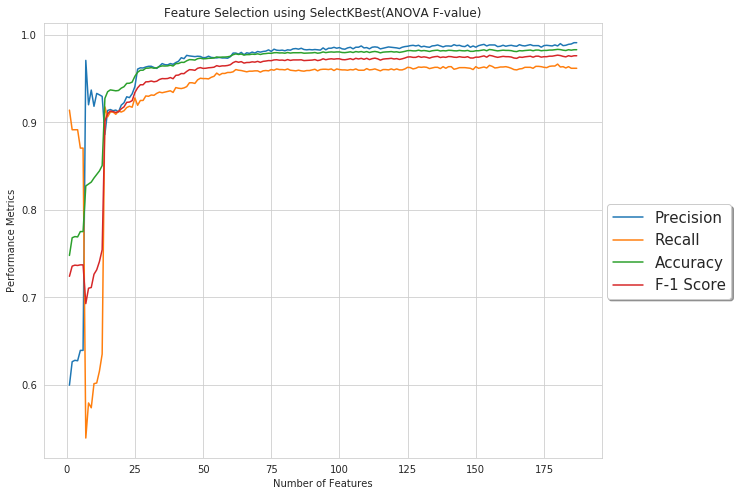

In [40]:
incremental_plot(1,188,title)

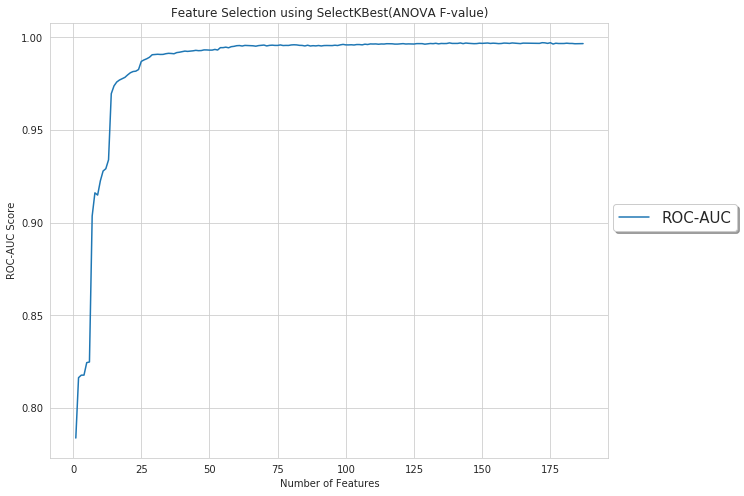

In [41]:
incremental_plot_auc(1,188,title)

In [42]:
X_top_feat_imps.shape

(7518, 186)

## Feature Importance (feature_importances_)

In [43]:
#RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
model.fit(X_train,y_train)
feat_importances = pd.Series(model.feature_importances_, index=X_validate.columns)

In [44]:
clear_metrics()
#X_top_feat_imps
for index in range(1,188,1):
    top_permissions_indexes = []
    top_permissions_indexes = feat_importances.nlargest(index).index
    X_top_feat_imps = X_validate.loc[:,top_permissions_indexes]
    print(X_top_feat_imps.shape)
    run_randomForest(X_top_feat_imps,y_validate, index)

(7518, 1)
Classification Report for Random Forest:    1
Accuracy: 0.7998   (+/- 0.0216)
Precision: 0.8424   (+/- 0.0216)
Recall: 0.5496   (+/- 0.0216)
F-1 Score: 0.6648   (+/- 0.0216)
ROC-AUC: 0.7456   (+/- 0.0216)
(7518, 2)
Classification Report for Random Forest:    2
Accuracy: 0.7998   (+/- 0.0216)
Precision: 0.8424   (+/- 0.0216)
Recall: 0.5496   (+/- 0.0216)
F-1 Score: 0.6648   (+/- 0.0216)
ROC-AUC: 0.8387   (+/- 0.0216)
(7518, 3)
Classification Report for Random Forest:    3
Accuracy: 0.8900   (+/- 0.0221)
Precision: 0.8325   (+/- 0.0221)
Recall: 0.8721   (+/- 0.0221)
F-1 Score: 0.8516   (+/- 0.0221)
ROC-AUC: 0.9254   (+/- 0.0221)
(7518, 4)
Classification Report for Random Forest:    4
Accuracy: 0.8908   (+/- 0.0225)
Precision: 0.8346   (+/- 0.0225)
Recall: 0.8717   (+/- 0.0225)
F-1 Score: 0.8524   (+/- 0.0225)
ROC-AUC: 0.9253   (+/- 0.0225)
(7518, 5)
Classification Report for Random Forest:    5
Accuracy: 0.9014   (+/- 0.0173)
Precision: 0.8283   (+/- 0.0173)
Recall: 0.9184   (+

Classification Report for Random Forest:    39
Accuracy: 0.9737   (+/- 0.0100)
Precision: 0.9742   (+/- 0.0100)
Recall: 0.9526   (+/- 0.0100)
F-1 Score: 0.9632   (+/- 0.0100)
ROC-AUC: 0.9946   (+/- 0.0100)
(7518, 40)
Classification Report for Random Forest:    40
Accuracy: 0.9766   (+/- 0.0111)
Precision: 0.9745   (+/- 0.0111)
Recall: 0.9607   (+/- 0.0111)
F-1 Score: 0.9674   (+/- 0.0111)
ROC-AUC: 0.9942   (+/- 0.0111)
(7518, 41)
Classification Report for Random Forest:    41
Accuracy: 0.9762   (+/- 0.0099)
Precision: 0.9751   (+/- 0.0099)
Recall: 0.9588   (+/- 0.0099)
F-1 Score: 0.9668   (+/- 0.0099)
ROC-AUC: 0.9942   (+/- 0.0099)
(7518, 42)
Classification Report for Random Forest:    42
Accuracy: 0.9770   (+/- 0.0103)
Precision: 0.9784   (+/- 0.0103)
Recall: 0.9577   (+/- 0.0103)
F-1 Score: 0.9678   (+/- 0.0103)
ROC-AUC: 0.9945   (+/- 0.0103)
(7518, 43)
Classification Report for Random Forest:    43
Accuracy: 0.9782   (+/- 0.0094)
Precision: 0.9785   (+/- 0.0094)
Recall: 0.9610   (+/

Classification Report for Random Forest:    77
Accuracy: 0.9822   (+/- 0.0084)
Precision: 0.9888   (+/- 0.0084)
Recall: 0.9618   (+/- 0.0084)
F-1 Score: 0.9750   (+/- 0.0084)
ROC-AUC: 0.9962   (+/- 0.0084)
(7518, 78)
Classification Report for Random Forest:    78
Accuracy: 0.9818   (+/- 0.0095)
Precision: 0.9862   (+/- 0.0095)
Recall: 0.9632   (+/- 0.0095)
F-1 Score: 0.9745   (+/- 0.0095)
ROC-AUC: 0.9962   (+/- 0.0095)
(7518, 79)
Classification Report for Random Forest:    79
Accuracy: 0.9820   (+/- 0.0096)
Precision: 0.9877   (+/- 0.0096)
Recall: 0.9625   (+/- 0.0096)
F-1 Score: 0.9748   (+/- 0.0096)
ROC-AUC: 0.9962   (+/- 0.0096)
(7518, 80)
Classification Report for Random Forest:    80
Accuracy: 0.9822   (+/- 0.0082)
Precision: 0.9884   (+/- 0.0082)
Recall: 0.9621   (+/- 0.0082)
F-1 Score: 0.9750   (+/- 0.0082)
ROC-AUC: 0.9963   (+/- 0.0082)
(7518, 81)
Classification Report for Random Forest:    81
Accuracy: 0.9822   (+/- 0.0075)
Precision: 0.9866   (+/- 0.0075)
Recall: 0.9640   (+/

Classification Report for Random Forest:    115
Accuracy: 0.9810   (+/- 0.0104)
Precision: 0.9873   (+/- 0.0104)
Recall: 0.9599   (+/- 0.0104)
F-1 Score: 0.9733   (+/- 0.0104)
ROC-AUC: 0.9964   (+/- 0.0104)
(7518, 116)
Classification Report for Random Forest:    116
Accuracy: 0.9823   (+/- 0.0091)
Precision: 0.9884   (+/- 0.0091)
Recall: 0.9625   (+/- 0.0091)
F-1 Score: 0.9752   (+/- 0.0091)
ROC-AUC: 0.9966   (+/- 0.0091)
(7518, 117)
Classification Report for Random Forest:    117
Accuracy: 0.9834   (+/- 0.0084)
Precision: 0.9892   (+/- 0.0084)
Recall: 0.9647   (+/- 0.0084)
F-1 Score: 0.9767   (+/- 0.0084)
ROC-AUC: 0.9967   (+/- 0.0084)
(7518, 118)
Classification Report for Random Forest:    118
Accuracy: 0.9826   (+/- 0.0098)
Precision: 0.9888   (+/- 0.0098)
Recall: 0.9629   (+/- 0.0098)
F-1 Score: 0.9756   (+/- 0.0098)
ROC-AUC: 0.9965   (+/- 0.0098)
(7518, 119)
Classification Report for Random Forest:    119
Accuracy: 0.9820   (+/- 0.0095)
Precision: 0.9891   (+/- 0.0095)
Recall: 0.9

Classification Report for Random Forest:    153
Accuracy: 0.9832   (+/- 0.0088)
Precision: 0.9895   (+/- 0.0088)
Recall: 0.9640   (+/- 0.0088)
F-1 Score: 0.9765   (+/- 0.0088)
ROC-AUC: 0.9970   (+/- 0.0088)
(7518, 154)
Classification Report for Random Forest:    154
Accuracy: 0.9824   (+/- 0.0101)
Precision: 0.9884   (+/- 0.0101)
Recall: 0.9629   (+/- 0.0101)
F-1 Score: 0.9754   (+/- 0.0101)
ROC-AUC: 0.9967   (+/- 0.0101)
(7518, 155)
Classification Report for Random Forest:    155
Accuracy: 0.9836   (+/- 0.0097)
Precision: 0.9903   (+/- 0.0097)
Recall: 0.9643   (+/- 0.0097)
F-1 Score: 0.9770   (+/- 0.0097)
ROC-AUC: 0.9967   (+/- 0.0097)
(7518, 156)
Classification Report for Random Forest:    156
Accuracy: 0.9832   (+/- 0.0088)
Precision: 0.9895   (+/- 0.0088)
Recall: 0.9640   (+/- 0.0088)
F-1 Score: 0.9765   (+/- 0.0088)
ROC-AUC: 0.9969   (+/- 0.0088)
(7518, 157)
Classification Report for Random Forest:    157
Accuracy: 0.9827   (+/- 0.0102)
Precision: 0.9895   (+/- 0.0102)
Recall: 0.9

In [45]:
title = "Feature Selection using Random Forest Classifier - Feature Importances"
results_to_csv(title)

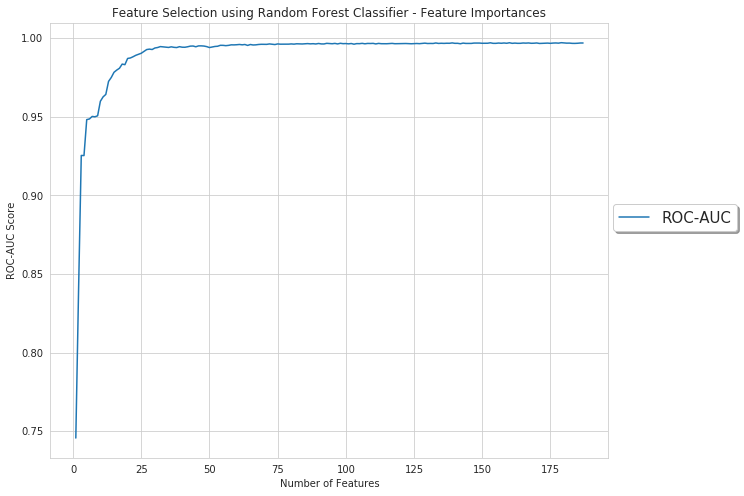

In [46]:
incremental_plot_auc(1,188, title)

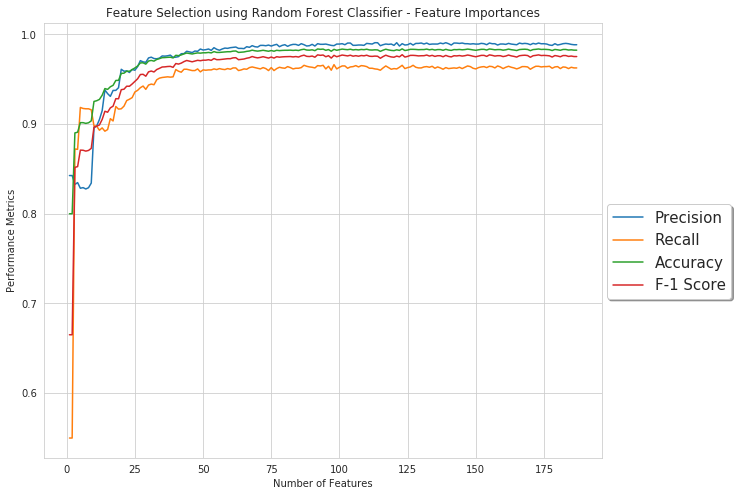

In [47]:
incremental_plot(1,188, title)


In [48]:
#ExtraTreeClassifier
model = ExtraTreesClassifier(n_estimators=100, random_state=0, n_jobs=-1)
model.fit(X_train,y_train)
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)

In [49]:
clear_metrics()
X_top_feat_imps
for index in range(1,188,1):
    top_permissions_indexes = []
    top_permissions_indexes = feat_importances.nlargest(index).index
    X_top_feat_imps = X_validate.loc[:,top_permissions_indexes ]
    print(X_top_feat_imps.shape)
    run_randomForest(X_top_feat_imps,y_validate, index)

(7518, 1)
Classification Report for Random Forest:    1
Accuracy: 0.7998   (+/- 0.0216)
Precision: 0.8424   (+/- 0.0216)
Recall: 0.5496   (+/- 0.0216)
F-1 Score: 0.6648   (+/- 0.0216)
ROC-AUC: 0.7456   (+/- 0.0216)
(7518, 2)
Classification Report for Random Forest:    2
Accuracy: 0.7998   (+/- 0.0216)
Precision: 0.8424   (+/- 0.0216)
Recall: 0.5496   (+/- 0.0216)
F-1 Score: 0.6648   (+/- 0.0216)
ROC-AUC: 0.8387   (+/- 0.0216)
(7518, 3)
Classification Report for Random Forest:    3
Accuracy: 0.8889   (+/- 0.0213)
Precision: 0.8288   (+/- 0.0213)
Recall: 0.8743   (+/- 0.0213)
F-1 Score: 0.8507   (+/- 0.0213)
ROC-AUC: 0.9251   (+/- 0.0213)
(7518, 4)
Classification Report for Random Forest:    4
Accuracy: 0.8992   (+/- 0.0184)
Precision: 0.8232   (+/- 0.0184)
Recall: 0.9191   (+/- 0.0184)
F-1 Score: 0.8683   (+/- 0.0184)
ROC-AUC: 0.9474   (+/- 0.0184)
(7518, 5)
Classification Report for Random Forest:    5
Accuracy: 0.8998   (+/- 0.0180)
Precision: 0.8246   (+/- 0.0180)
Recall: 0.9191   (+

Classification Report for Random Forest:    39
Accuracy: 0.9742   (+/- 0.0112)
Precision: 0.9733   (+/- 0.0112)
Recall: 0.9551   (+/- 0.0112)
F-1 Score: 0.9640   (+/- 0.0112)
ROC-AUC: 0.9941   (+/- 0.0112)
(7518, 40)
Classification Report for Random Forest:    40
Accuracy: 0.9758   (+/- 0.0099)
Precision: 0.9748   (+/- 0.0099)
Recall: 0.9581   (+/- 0.0099)
F-1 Score: 0.9662   (+/- 0.0099)
ROC-AUC: 0.9943   (+/- 0.0099)
(7518, 41)
Classification Report for Random Forest:    41
Accuracy: 0.9750   (+/- 0.0118)
Precision: 0.9719   (+/- 0.0118)
Recall: 0.9588   (+/- 0.0118)
F-1 Score: 0.9652   (+/- 0.0118)
ROC-AUC: 0.9943   (+/- 0.0118)
(7518, 42)
Classification Report for Random Forest:    42
Accuracy: 0.9757   (+/- 0.0105)
Precision: 0.9760   (+/- 0.0105)
Recall: 0.9566   (+/- 0.0105)
F-1 Score: 0.9660   (+/- 0.0105)
ROC-AUC: 0.9944   (+/- 0.0105)
(7518, 43)
Classification Report for Random Forest:    43
Accuracy: 0.9767   (+/- 0.0097)
Precision: 0.9778   (+/- 0.0097)
Recall: 0.9577   (+/

Classification Report for Random Forest:    77
Accuracy: 0.9820   (+/- 0.0088)
Precision: 0.9877   (+/- 0.0088)
Recall: 0.9625   (+/- 0.0088)
F-1 Score: 0.9748   (+/- 0.0088)
ROC-AUC: 0.9964   (+/- 0.0088)
(7518, 78)
Classification Report for Random Forest:    78
Accuracy: 0.9826   (+/- 0.0071)
Precision: 0.9881   (+/- 0.0071)
Recall: 0.9636   (+/- 0.0071)
F-1 Score: 0.9756   (+/- 0.0071)
ROC-AUC: 0.9964   (+/- 0.0071)
(7518, 79)
Classification Report for Random Forest:    79
Accuracy: 0.9819   (+/- 0.0082)
Precision: 0.9877   (+/- 0.0082)
Recall: 0.9621   (+/- 0.0082)
F-1 Score: 0.9746   (+/- 0.0082)
ROC-AUC: 0.9966   (+/- 0.0082)
(7518, 80)
Classification Report for Random Forest:    80
Accuracy: 0.9820   (+/- 0.0088)
Precision: 0.9873   (+/- 0.0088)
Recall: 0.9629   (+/- 0.0088)
F-1 Score: 0.9748   (+/- 0.0088)
ROC-AUC: 0.9965   (+/- 0.0088)
(7518, 81)
Classification Report for Random Forest:    81
Accuracy: 0.9824   (+/- 0.0086)
Precision: 0.9866   (+/- 0.0086)
Recall: 0.9647   (+/

Classification Report for Random Forest:    115
Accuracy: 0.9836   (+/- 0.0089)
Precision: 0.9888   (+/- 0.0089)
Recall: 0.9658   (+/- 0.0089)
F-1 Score: 0.9771   (+/- 0.0089)
ROC-AUC: 0.9969   (+/- 0.0089)
(7518, 116)
Classification Report for Random Forest:    116
Accuracy: 0.9819   (+/- 0.0097)
Precision: 0.9887   (+/- 0.0097)
Recall: 0.9610   (+/- 0.0097)
F-1 Score: 0.9746   (+/- 0.0097)
ROC-AUC: 0.9966   (+/- 0.0097)
(7518, 117)
Classification Report for Random Forest:    117
Accuracy: 0.9823   (+/- 0.0091)
Precision: 0.9880   (+/- 0.0091)
Recall: 0.9629   (+/- 0.0091)
F-1 Score: 0.9752   (+/- 0.0091)
ROC-AUC: 0.9963   (+/- 0.0091)
(7518, 118)
Classification Report for Random Forest:    118
Accuracy: 0.9826   (+/- 0.0107)
Precision: 0.9899   (+/- 0.0107)
Recall: 0.9618   (+/- 0.0107)
F-1 Score: 0.9755   (+/- 0.0107)
ROC-AUC: 0.9965   (+/- 0.0107)
(7518, 119)
Classification Report for Random Forest:    119
Accuracy: 0.9827   (+/- 0.0082)
Precision: 0.9888   (+/- 0.0082)
Recall: 0.9

Classification Report for Random Forest:    153
Accuracy: 0.9822   (+/- 0.0097)
Precision: 0.9880   (+/- 0.0097)
Recall: 0.9625   (+/- 0.0097)
F-1 Score: 0.9750   (+/- 0.0097)
ROC-AUC: 0.9969   (+/- 0.0097)
(7518, 154)
Classification Report for Random Forest:    154
Accuracy: 0.9839   (+/- 0.0081)
Precision: 0.9899   (+/- 0.0081)
Recall: 0.9654   (+/- 0.0081)
F-1 Score: 0.9774   (+/- 0.0081)
ROC-AUC: 0.9971   (+/- 0.0081)
(7518, 155)
Classification Report for Random Forest:    155
Accuracy: 0.9834   (+/- 0.0079)
Precision: 0.9892   (+/- 0.0079)
Recall: 0.9647   (+/- 0.0079)
F-1 Score: 0.9767   (+/- 0.0079)
ROC-AUC: 0.9966   (+/- 0.0079)
(7518, 156)
Classification Report for Random Forest:    156
Accuracy: 0.9830   (+/- 0.0106)
Precision: 0.9895   (+/- 0.0106)
Recall: 0.9632   (+/- 0.0106)
F-1 Score: 0.9761   (+/- 0.0106)
ROC-AUC: 0.9969   (+/- 0.0106)
(7518, 157)
Classification Report for Random Forest:    157
Accuracy: 0.9826   (+/- 0.0094)
Precision: 0.9891   (+/- 0.0094)
Recall: 0.9

In [50]:
title = "Feature Selection using Extra Trees Classifier Feature - Importances"
results_to_csv(title)

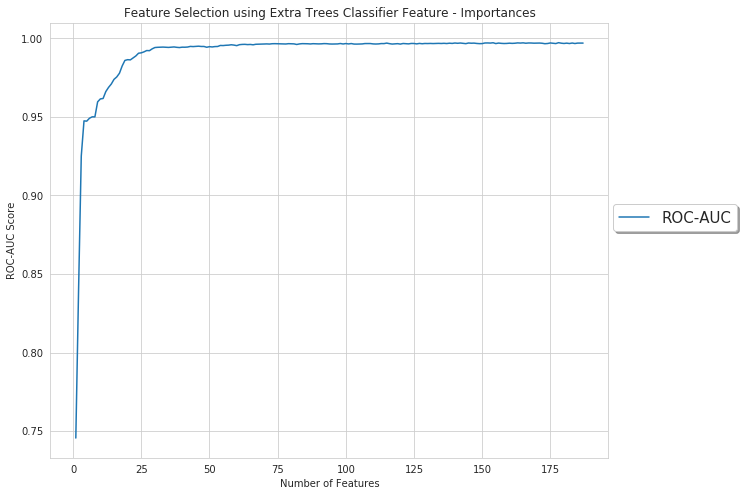

In [51]:
incremental_plot_auc(1,188, title)

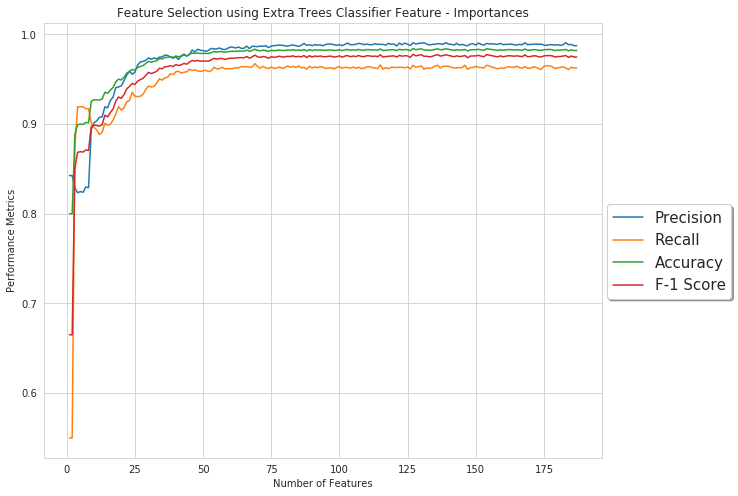

In [52]:
incremental_plot(1,188, title)


## Feature Selection Based on Mutual Information (Entropy) Gain

In [53]:
from sklearn.feature_selection import mutual_info_classif

In [54]:
mi = mutual_info_classif(X_train, y_train)

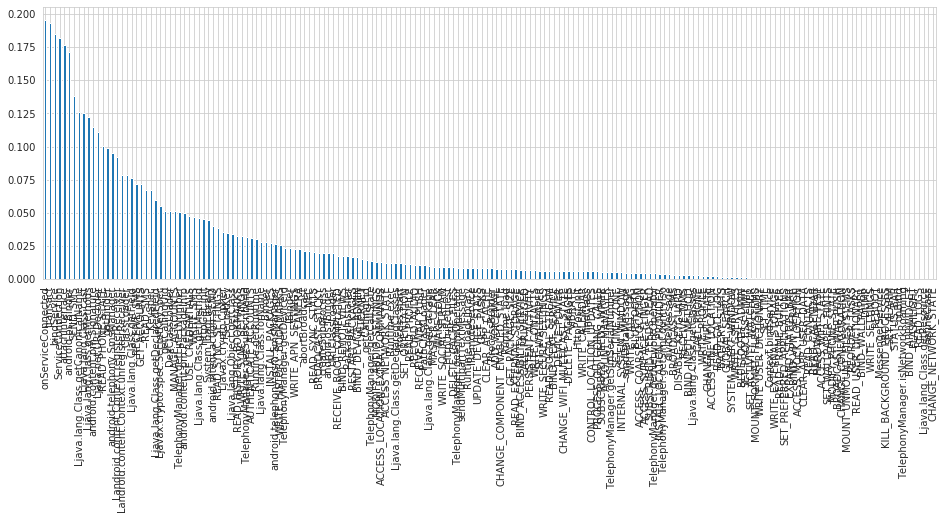

In [55]:
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False, inplace = True)
mi.plot.bar(figsize = (16,5))

In [56]:
clear_metrics()
for index in range(1, 188,1):
    top_permissions_indexes = []
    top_permissions_indexes = mi.nlargest(index).index
    X_top_feat_imps = X_validate.loc[:,top_permissions_indexes ]
    print(X_top_feat_imps.shape)
    run_randomForest(X_top_feat_imps,y_validate, index)

(7518, 1)
Classification Report for Random Forest:    1
Accuracy: 0.7479   (+/- 0.0282)
Precision: 0.5997   (+/- 0.0282)
Recall: 0.9140   (+/- 0.0282)
F-1 Score: 0.7241   (+/- 0.0282)
ROC-AUC: 0.7839   (+/- 0.0282)
(7518, 2)
Classification Report for Random Forest:    2
Accuracy: 0.7682   (+/- 0.0349)
Precision: 0.6265   (+/- 0.0349)
Recall: 0.8915   (+/- 0.0349)
F-1 Score: 0.7357   (+/- 0.0349)
ROC-AUC: 0.8164   (+/- 0.0349)
(7518, 3)
Classification Report for Random Forest:    3
Accuracy: 0.7695   (+/- 0.0334)
Precision: 0.6281   (+/- 0.0334)
Recall: 0.8915   (+/- 0.0334)
F-1 Score: 0.7368   (+/- 0.0334)
ROC-AUC: 0.8178   (+/- 0.0334)
(7518, 4)
Classification Report for Random Forest:    4
Accuracy: 0.7691   (+/- 0.0326)
Precision: 0.6276   (+/- 0.0326)
Recall: 0.8915   (+/- 0.0326)
F-1 Score: 0.7365   (+/- 0.0326)
ROC-AUC: 0.8178   (+/- 0.0326)
(7518, 5)
Classification Report for Random Forest:    5
Accuracy: 0.7703   (+/- 0.0335)
Precision: 0.6292   (+/- 0.0335)
Recall: 0.8908   (+

Classification Report for Random Forest:    39
Accuracy: 0.9649   (+/- 0.0105)
Precision: 0.9657   (+/- 0.0105)
Recall: 0.9364   (+/- 0.0105)
F-1 Score: 0.9507   (+/- 0.0105)
ROC-AUC: 0.9916   (+/- 0.0105)
(7518, 40)
Classification Report for Random Forest:    40
Accuracy: 0.9662   (+/- 0.0083)
Precision: 0.9679   (+/- 0.0083)
Recall: 0.9379   (+/- 0.0083)
F-1 Score: 0.9525   (+/- 0.0083)
ROC-AUC: 0.9922   (+/- 0.0083)
(7518, 41)
Classification Report for Random Forest:    41
Accuracy: 0.9675   (+/- 0.0087)
Precision: 0.9712   (+/- 0.0087)
Recall: 0.9382   (+/- 0.0087)
F-1 Score: 0.9543   (+/- 0.0087)
ROC-AUC: 0.9925   (+/- 0.0087)
(7518, 42)
Classification Report for Random Forest:    42
Accuracy: 0.9678   (+/- 0.0094)
Precision: 0.9716   (+/- 0.0094)
Recall: 0.9386   (+/- 0.0094)
F-1 Score: 0.9547   (+/- 0.0094)
ROC-AUC: 0.9927   (+/- 0.0094)
(7518, 43)
Classification Report for Random Forest:    43
Accuracy: 0.9689   (+/- 0.0091)
Precision: 0.9724   (+/- 0.0091)
Recall: 0.9408   (+/

Classification Report for Random Forest:    77
Accuracy: 0.9791   (+/- 0.0088)
Precision: 0.9813   (+/- 0.0088)
Recall: 0.9607   (+/- 0.0088)
F-1 Score: 0.9708   (+/- 0.0088)
ROC-AUC: 0.9958   (+/- 0.0088)
(7518, 78)
Classification Report for Random Forest:    78
Accuracy: 0.9798   (+/- 0.0072)
Precision: 0.9835   (+/- 0.0072)
Recall: 0.9603   (+/- 0.0072)
F-1 Score: 0.9717   (+/- 0.0072)
ROC-AUC: 0.9958   (+/- 0.0072)
(7518, 79)
Classification Report for Random Forest:    79
Accuracy: 0.9792   (+/- 0.0076)
Precision: 0.9825   (+/- 0.0076)
Recall: 0.9599   (+/- 0.0076)
F-1 Score: 0.9710   (+/- 0.0076)
ROC-AUC: 0.9957   (+/- 0.0076)
(7518, 80)
Classification Report for Random Forest:    80
Accuracy: 0.9783   (+/- 0.0090)
Precision: 0.9802   (+/- 0.0090)
Recall: 0.9596   (+/- 0.0090)
F-1 Score: 0.9697   (+/- 0.0090)
ROC-AUC: 0.9959   (+/- 0.0090)
(7518, 81)
Classification Report for Random Forest:    81
Accuracy: 0.9792   (+/- 0.0074)
Precision: 0.9824   (+/- 0.0074)
Recall: 0.9599   (+/

Classification Report for Random Forest:    115
Accuracy: 0.9804   (+/- 0.0069)
Precision: 0.9851   (+/- 0.0069)
Recall: 0.9607   (+/- 0.0069)
F-1 Score: 0.9726   (+/- 0.0069)
ROC-AUC: 0.9965   (+/- 0.0069)
(7518, 116)
Classification Report for Random Forest:    116
Accuracy: 0.9795   (+/- 0.0069)
Precision: 0.9854   (+/- 0.0069)
Recall: 0.9577   (+/- 0.0069)
F-1 Score: 0.9713   (+/- 0.0069)
ROC-AUC: 0.9967   (+/- 0.0069)
(7518, 117)
Classification Report for Random Forest:    117
Accuracy: 0.9810   (+/- 0.0075)
Precision: 0.9873   (+/- 0.0075)
Recall: 0.9599   (+/- 0.0075)
F-1 Score: 0.9733   (+/- 0.0075)
ROC-AUC: 0.9968   (+/- 0.0075)
(7518, 118)
Classification Report for Random Forest:    118
Accuracy: 0.9795   (+/- 0.0083)
Precision: 0.9846   (+/- 0.0083)
Recall: 0.9585   (+/- 0.0083)
F-1 Score: 0.9713   (+/- 0.0083)
ROC-AUC: 0.9966   (+/- 0.0083)
(7518, 119)
Classification Report for Random Forest:    119
Accuracy: 0.9802   (+/- 0.0084)
Precision: 0.9861   (+/- 0.0084)
Recall: 0.9

Classification Report for Random Forest:    153
Accuracy: 0.9816   (+/- 0.0082)
Precision: 0.9862   (+/- 0.0082)
Recall: 0.9629   (+/- 0.0082)
F-1 Score: 0.9743   (+/- 0.0082)
ROC-AUC: 0.9966   (+/- 0.0082)
(7518, 154)
Classification Report for Random Forest:    154
Accuracy: 0.9811   (+/- 0.0073)
Precision: 0.9847   (+/- 0.0073)
Recall: 0.9629   (+/- 0.0073)
F-1 Score: 0.9736   (+/- 0.0073)
ROC-AUC: 0.9967   (+/- 0.0073)
(7518, 155)
Classification Report for Random Forest:    155
Accuracy: 0.9812   (+/- 0.0070)
Precision: 0.9866   (+/- 0.0070)
Recall: 0.9614   (+/- 0.0070)
F-1 Score: 0.9737   (+/- 0.0070)
ROC-AUC: 0.9968   (+/- 0.0070)
(7518, 156)
Classification Report for Random Forest:    156
Accuracy: 0.9819   (+/- 0.0091)
Precision: 0.9880   (+/- 0.0091)
Recall: 0.9618   (+/- 0.0091)
F-1 Score: 0.9746   (+/- 0.0091)
ROC-AUC: 0.9971   (+/- 0.0091)
(7518, 157)
Classification Report for Random Forest:    157
Accuracy: 0.9814   (+/- 0.0085)
Precision: 0.9873   (+/- 0.0085)
Recall: 0.9

In [57]:
title = "Feature Selection using Mutual Information Gain (Entropy)"
results_to_csv(title)

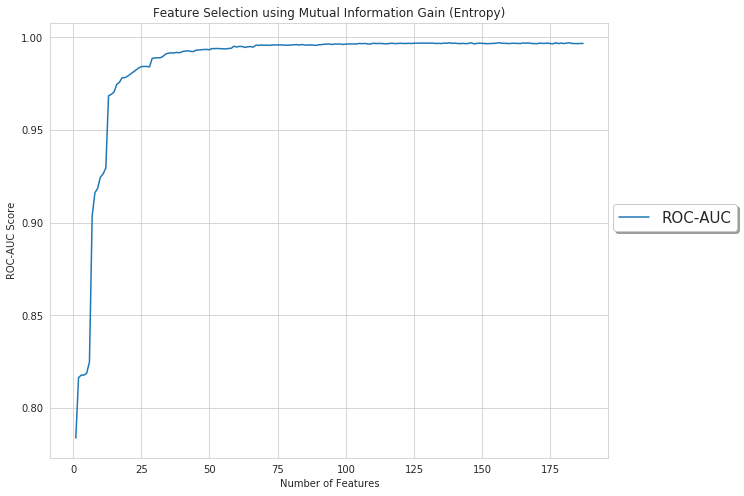

In [58]:
incremental_plot_auc(1,188, title)

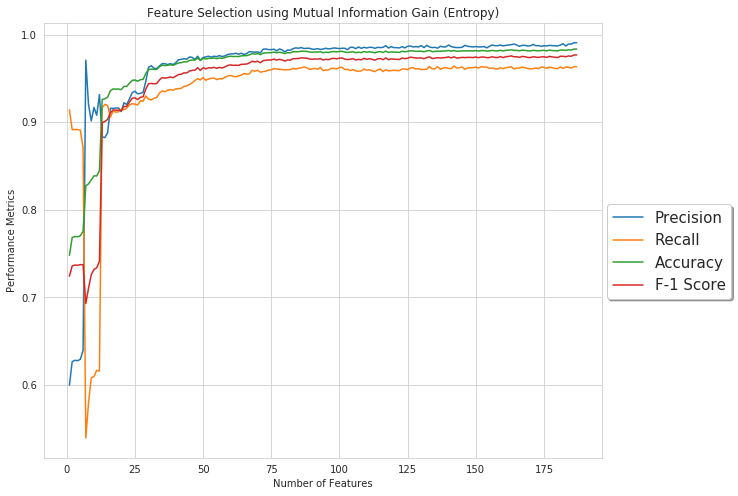

In [59]:
incremental_plot(1,188, title)


In [262]:
top_permissions_indexes = mi.nlargest(30).index
X_top_feat_imps = X.loc[:,top_permissions_indexes ]
print(X_top_feat_imps.shape)
run_randomForest(X_top_feat_imps,y_all, index)

(15036, 30)
Classification Report for Random Forest:    31
Accuracy: 0.9464   (+/- 0.0114)
Precision: 0.9571   (+/- 0.0114)
Recall: 0.8953   (+/- 0.0114)
F-1 Score: 0.9251   (+/- 0.0114)
ROC-AUC: 0.9863   (+/- 0.0114)


## Feature Selection Based on Univariate ROC_AUC for Classification

In [60]:
from sklearn.metrics import roc_auc_score

roc_auc = []
for feature in X_train.columns:
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train[feature].to_frame(), y_train)
    y_pred = clf.predict(X_validate[feature].to_frame())
    roc_auc.append(roc_auc_score(y_validate, y_pred))

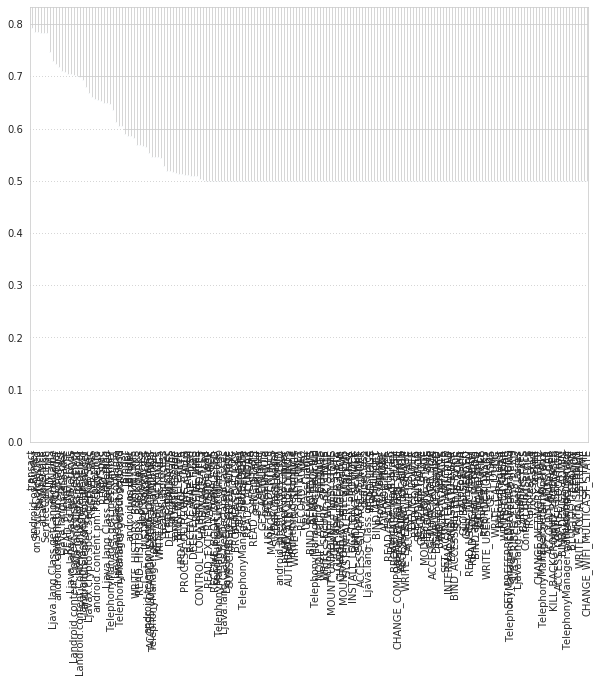

In [61]:
roc_values = pd.Series(roc_auc)
roc_values.index = X_train.columns
roc_values.sort_values(ascending =False, inplace = True)
roc_values.plot.bar()

In [62]:
sel = roc_values[roc_values>0.5]
X_roc_auc = X_train[sel.index]
X_roc_auc.shape

(7518, 58)

In [63]:
clear_metrics()
for index in range(1, len(sel)):
    top_permissions_indexes = []
    top_permissions_indexes = sel.nlargest(index).index
    X_top_feat_imps = X_validate.loc[:,top_permissions_indexes ]
    print(X_top_feat_imps.shape)
    run_randomForest(X_top_feat_imps,y_validate, index)

(7518, 1)
Classification Report for Random Forest:    1
Accuracy: 0.7509   (+/- 0.0343)
Precision: 0.5989   (+/- 0.0343)
Recall: 0.9452   (+/- 0.0343)
F-1 Score: 0.7331   (+/- 0.0343)
ROC-AUC: 0.7930   (+/- 0.0343)
(7518, 2)
Classification Report for Random Forest:    2
Accuracy: 0.7606   (+/- 0.0398)
Precision: 0.6200   (+/- 0.0398)
Recall: 0.8768   (+/- 0.0398)
F-1 Score: 0.7262   (+/- 0.0398)
ROC-AUC: 0.8061   (+/- 0.0398)
(7518, 3)
Classification Report for Random Forest:    3
Accuracy: 0.7739   (+/- 0.0429)
Precision: 0.6382   (+/- 0.0429)
Recall: 0.8688   (+/- 0.0429)
F-1 Score: 0.7356   (+/- 0.0429)
ROC-AUC: 0.8234   (+/- 0.0429)
(7518, 4)
Classification Report for Random Forest:    4
Accuracy: 0.7751   (+/- 0.0423)
Precision: 0.6393   (+/- 0.0423)
Recall: 0.8706   (+/- 0.0423)
F-1 Score: 0.7371   (+/- 0.0423)
ROC-AUC: 0.8240   (+/- 0.0423)
(7518, 5)
Classification Report for Random Forest:    5
Accuracy: 0.7751   (+/- 0.0423)
Precision: 0.6393   (+/- 0.0423)
Recall: 0.8706   (+

Classification Report for Random Forest:    39
Accuracy: 0.9678   (+/- 0.0128)
Precision: 0.9681   (+/- 0.0128)
Recall: 0.9423   (+/- 0.0128)
F-1 Score: 0.9549   (+/- 0.0128)
ROC-AUC: 0.9912   (+/- 0.0128)
(7518, 40)
Classification Report for Random Forest:    40
Accuracy: 0.9678   (+/- 0.0139)
Precision: 0.9685   (+/- 0.0139)
Recall: 0.9419   (+/- 0.0139)
F-1 Score: 0.9548   (+/- 0.0139)
ROC-AUC: 0.9916   (+/- 0.0139)
(7518, 41)
Classification Report for Random Forest:    41
Accuracy: 0.9675   (+/- 0.0132)
Precision: 0.9687   (+/- 0.0132)
Recall: 0.9408   (+/- 0.0132)
F-1 Score: 0.9544   (+/- 0.0132)
ROC-AUC: 0.9915   (+/- 0.0132)
(7518, 42)
Classification Report for Random Forest:    42
Accuracy: 0.9697   (+/- 0.0146)
Precision: 0.9717   (+/- 0.0146)
Recall: 0.9437   (+/- 0.0146)
F-1 Score: 0.9574   (+/- 0.0146)
ROC-AUC: 0.9915   (+/- 0.0146)
(7518, 43)
Classification Report for Random Forest:    43
Accuracy: 0.9697   (+/- 0.0148)
Precision: 0.9734   (+/- 0.0148)
Recall: 0.9419   (+/

In [91]:
top_permissions_indexes = []
top_permissions_indexes = sel.nlargest(30).index
X_top_feat_imps = X.loc[:,top_permissions_indexes ]
print(X_top_feat_imps.shape)


NameError: name 'X' is not defined

In [ ]:
%%time 
run_randomForest(X_top_feat_imps,y_all, index)

In [64]:
title = "Feature Selection Based on Univariate ROC_AUC Score"
results_to_csv(title)

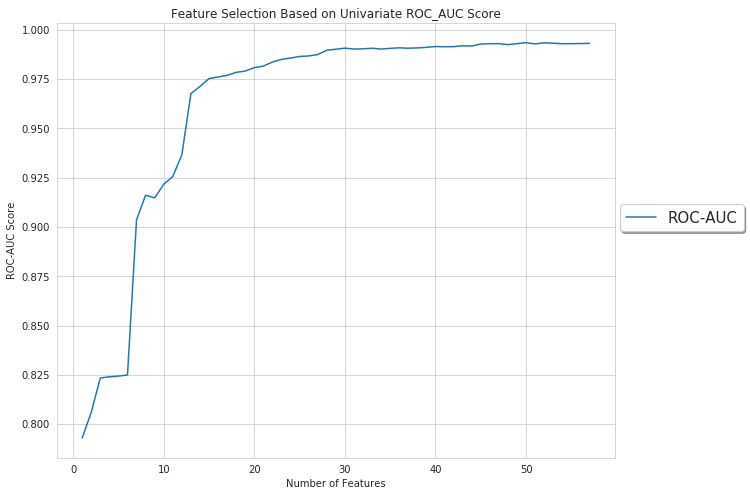

In [65]:
incremental_plot_auc(1,len(sel), title)

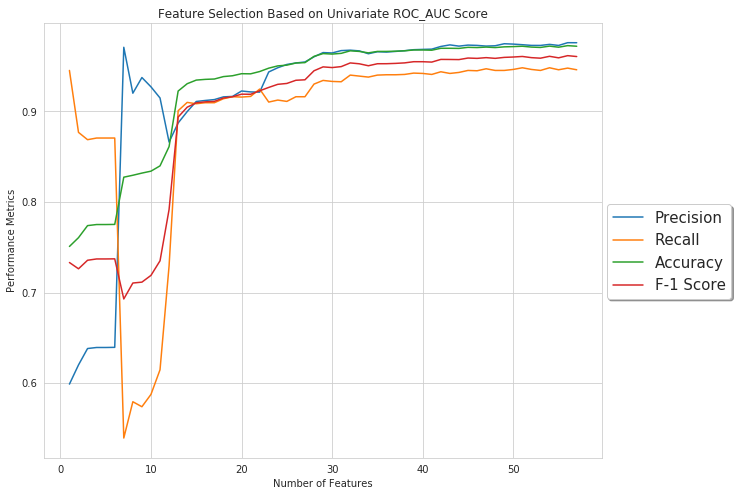

In [66]:
incremental_plot(1,len(sel), title)


## Feature Selection using Principal Component Analysis

In [67]:
clear_metrics()
for component in range(1,188):
    pca = PCA(n_components=component, random_state=0)
    pca.fit(X_train)
    X_pca_optimal = pca.transform(X_validate)
    print('Selected Components: ', component)
    run_randomForest(X_pca_optimal,y_validate,component)
    print()

Selected Components:  1
Classification Report for Random Forest:    1
Accuracy: 0.8742   (+/- 0.0291)
Precision: 0.8212   (+/- 0.0291)
Recall: 0.8342   (+/- 0.0291)
F-1 Score: 0.8273   (+/- 0.0291)
ROC-AUC: 0.9229   (+/- 0.0291)

Selected Components:  2
Classification Report for Random Forest:    2
Accuracy: 0.9522   (+/- 0.0119)
Precision: 0.9378   (+/- 0.0119)
Recall: 0.9298   (+/- 0.0119)
F-1 Score: 0.9337   (+/- 0.0119)
ROC-AUC: 0.9825   (+/- 0.0119)

Selected Components:  3
Classification Report for Random Forest:    3
Accuracy: 0.9604   (+/- 0.0122)
Precision: 0.9477   (+/- 0.0122)
Recall: 0.9426   (+/- 0.0122)
F-1 Score: 0.9450   (+/- 0.0122)
ROC-AUC: 0.9904   (+/- 0.0122)

Selected Components:  4
Classification Report for Random Forest:    4
Accuracy: 0.9620   (+/- 0.0136)
Precision: 0.9499   (+/- 0.0136)
Recall: 0.9449   (+/- 0.0136)
F-1 Score: 0.9473   (+/- 0.0136)
ROC-AUC: 0.9915   (+/- 0.0136)

Selected Components:  5
Classification Report for Random Forest:    5
Accuracy: 

Classification Report for Random Forest:    37
Accuracy: 0.9762   (+/- 0.0057)
Precision: 0.9831   (+/- 0.0057)
Recall: 0.9507   (+/- 0.0057)
F-1 Score: 0.9665   (+/- 0.0057)
ROC-AUC: 0.9951   (+/- 0.0057)

Selected Components:  38
Classification Report for Random Forest:    38
Accuracy: 0.9750   (+/- 0.0077)
Precision: 0.9808   (+/- 0.0077)
Recall: 0.9496   (+/- 0.0077)
F-1 Score: 0.9649   (+/- 0.0077)
ROC-AUC: 0.9949   (+/- 0.0077)

Selected Components:  39
Classification Report for Random Forest:    39
Accuracy: 0.9763   (+/- 0.0063)
Precision: 0.9841   (+/- 0.0063)
Recall: 0.9500   (+/- 0.0063)
F-1 Score: 0.9667   (+/- 0.0063)
ROC-AUC: 0.9951   (+/- 0.0063)

Selected Components:  40
Classification Report for Random Forest:    40
Accuracy: 0.9762   (+/- 0.0070)
Precision: 0.9827   (+/- 0.0070)
Recall: 0.9511   (+/- 0.0070)
F-1 Score: 0.9665   (+/- 0.0070)
ROC-AUC: 0.9946   (+/- 0.0070)

Selected Components:  41
Classification Report for Random Forest:    41
Accuracy: 0.9750   (+/- 0

Classification Report for Random Forest:    73
Accuracy: 0.9745   (+/- 0.0100)
Precision: 0.9911   (+/- 0.0100)
Recall: 0.9379   (+/- 0.0100)
F-1 Score: 0.9637   (+/- 0.0100)
ROC-AUC: 0.9946   (+/- 0.0100)

Selected Components:  74
Classification Report for Random Forest:    74
Accuracy: 0.9746   (+/- 0.0095)
Precision: 0.9922   (+/- 0.0095)
Recall: 0.9371   (+/- 0.0095)
F-1 Score: 0.9638   (+/- 0.0095)
ROC-AUC: 0.9943   (+/- 0.0095)

Selected Components:  75
Classification Report for Random Forest:    75
Accuracy: 0.9755   (+/- 0.0106)
Precision: 0.9919   (+/- 0.0106)
Recall: 0.9401   (+/- 0.0106)
F-1 Score: 0.9652   (+/- 0.0106)
ROC-AUC: 0.9947   (+/- 0.0106)

Selected Components:  76
Classification Report for Random Forest:    76
Accuracy: 0.9753   (+/- 0.0089)
Precision: 0.9912   (+/- 0.0089)
Recall: 0.9401   (+/- 0.0089)
F-1 Score: 0.9649   (+/- 0.0089)
ROC-AUC: 0.9948   (+/- 0.0089)

Selected Components:  77
Classification Report for Random Forest:    77
Accuracy: 0.9751   (+/- 0

Classification Report for Random Forest:    109
Accuracy: 0.9739   (+/- 0.0106)
Precision: 0.9926   (+/- 0.0106)
Recall: 0.9349   (+/- 0.0106)
F-1 Score: 0.9628   (+/- 0.0106)
ROC-AUC: 0.9947   (+/- 0.0106)

Selected Components:  110
Classification Report for Random Forest:    110
Accuracy: 0.9725   (+/- 0.0117)
Precision: 0.9937   (+/- 0.0117)
Recall: 0.9298   (+/- 0.0117)
F-1 Score: 0.9606   (+/- 0.0117)
ROC-AUC: 0.9945   (+/- 0.0117)

Selected Components:  111
Classification Report for Random Forest:    111
Accuracy: 0.9729   (+/- 0.0110)
Precision: 0.9949   (+/- 0.0110)
Recall: 0.9298   (+/- 0.0110)
F-1 Score: 0.9612   (+/- 0.0110)
ROC-AUC: 0.9946   (+/- 0.0110)

Selected Components:  112
Classification Report for Random Forest:    112
Accuracy: 0.9727   (+/- 0.0140)
Precision: 0.9937   (+/- 0.0140)
Recall: 0.9305   (+/- 0.0140)
F-1 Score: 0.9610   (+/- 0.0140)
ROC-AUC: 0.9943   (+/- 0.0140)

Selected Components:  113
Classification Report for Random Forest:    113
Accuracy: 0.9739

Selected Components:  145
Classification Report for Random Forest:    145
Accuracy: 0.9725   (+/- 0.0117)
Precision: 0.9961   (+/- 0.0117)
Recall: 0.9276   (+/- 0.0117)
F-1 Score: 0.9605   (+/- 0.0117)
ROC-AUC: 0.9950   (+/- 0.0117)

Selected Components:  146
Classification Report for Random Forest:    146
Accuracy: 0.9718   (+/- 0.0102)
Precision: 0.9957   (+/- 0.0102)
Recall: 0.9261   (+/- 0.0102)
F-1 Score: 0.9596   (+/- 0.0102)
ROC-AUC: 0.9952   (+/- 0.0102)

Selected Components:  147
Classification Report for Random Forest:    147
Accuracy: 0.9717   (+/- 0.0108)
Precision: 0.9949   (+/- 0.0108)
Recall: 0.9265   (+/- 0.0108)
F-1 Score: 0.9594   (+/- 0.0108)
ROC-AUC: 0.9950   (+/- 0.0108)

Selected Components:  148
Classification Report for Random Forest:    148
Accuracy: 0.9706   (+/- 0.0098)
Precision: 0.9949   (+/- 0.0098)
Recall: 0.9235   (+/- 0.0098)
F-1 Score: 0.9578   (+/- 0.0098)
ROC-AUC: 0.9951   (+/- 0.0098)

Selected Components:  149
Classification Report for Random Fores

Classification Report for Random Forest:    180
Accuracy: 0.9703   (+/- 0.0100)
Precision: 0.9964   (+/- 0.0100)
Recall: 0.9213   (+/- 0.0100)
F-1 Score: 0.9573   (+/- 0.0100)
ROC-AUC: 0.9948   (+/- 0.0100)

Selected Components:  181
Classification Report for Random Forest:    181
Accuracy: 0.9709   (+/- 0.0116)
Precision: 0.9965   (+/- 0.0116)
Recall: 0.9228   (+/- 0.0116)
F-1 Score: 0.9581   (+/- 0.0116)
ROC-AUC: 0.9947   (+/- 0.0116)

Selected Components:  182
Classification Report for Random Forest:    182
Accuracy: 0.9702   (+/- 0.0088)
Precision: 0.9972   (+/- 0.0088)
Recall: 0.9202   (+/- 0.0088)
F-1 Score: 0.9571   (+/- 0.0088)
ROC-AUC: 0.9949   (+/- 0.0088)

Selected Components:  183
Classification Report for Random Forest:    183
Accuracy: 0.9703   (+/- 0.0083)
Precision: 0.9953   (+/- 0.0083)
Recall: 0.9224   (+/- 0.0083)
F-1 Score: 0.9574   (+/- 0.0083)
ROC-AUC: 0.9947   (+/- 0.0083)

Selected Components:  184
Classification Report for Random Forest:    184
Accuracy: 0.9691

ValueError: n_components=187 must be between 0 and min(n_samples, n_features)=186 with svd_solver='full'

In [68]:
title = "Feature Selection using Principal Component Analysis"
results_to_csv(title)

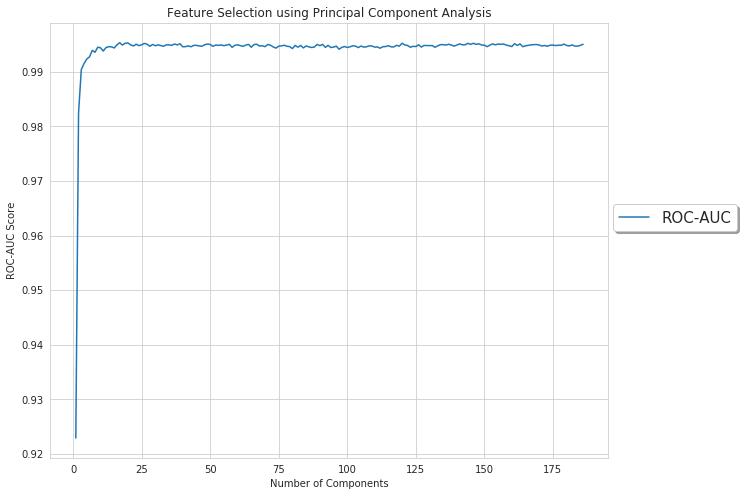

In [69]:
incremental_plot_auc(1,187, title, "Number of Components")

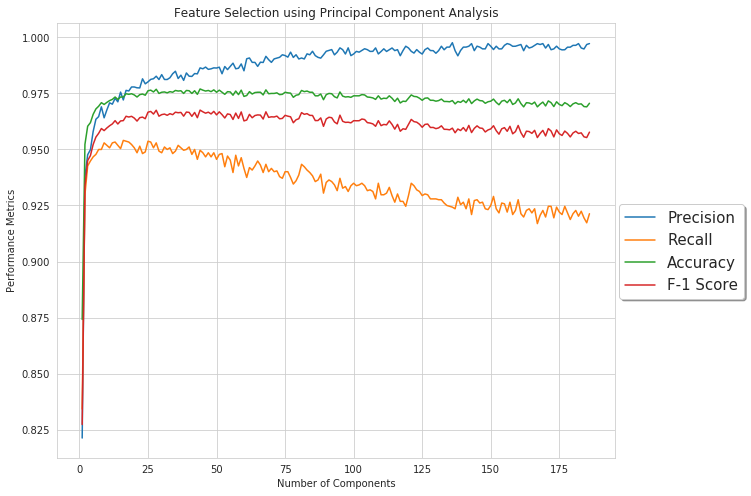

In [70]:
incremental_plot(1,187, title, "Number of Components")


## Feature Selection using RFE (RandomForestClassifier)

In [15]:
#best RFE(RandomForestClassifier) features
clear_metrics()
for index in range(1, 216, 3):
    sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select=index)
    sel.fit(X_train, y_train)
    X_transform = sel.transform(X_validate)
    print(X_transform.shape)
    print('Selected Feature: ', index)
    run_randomForest(X_transform, y_validate, index)

(7518, 1)
Selected Feature:  1
Classification Report for Random Forest:    1
Accuracy: 0.7479   (+/- 0.0282)
Precision: 0.5997   (+/- 0.0282)
Recall: 0.9140   (+/- 0.0282)
F-1 Score: 0.7241   (+/- 0.0282)
ROC-AUC: 0.7839   (+/- 0.0282)
(7518, 4)
Selected Feature:  4
Classification Report for Random Forest:    4
Accuracy: 0.8998   (+/- 0.0184)
Precision: 0.8248   (+/- 0.0184)
Recall: 0.9187   (+/- 0.0184)
F-1 Score: 0.8690   (+/- 0.0184)
ROC-AUC: 0.9483   (+/- 0.0184)
(7518, 7)
Selected Feature:  7
Classification Report for Random Forest:    7
Accuracy: 0.9244   (+/- 0.0219)
Precision: 0.8925   (+/- 0.0219)
Recall: 0.8996   (+/- 0.0219)
F-1 Score: 0.8959   (+/- 0.0219)
ROC-AUC: 0.9594   (+/- 0.0219)
(7518, 10)
Selected Feature:  10
Classification Report for Random Forest:    10
Accuracy: 0.9272   (+/- 0.0232)
Precision: 0.9075   (+/- 0.0232)
Recall: 0.8897   (+/- 0.0232)
F-1 Score: 0.8983   (+/- 0.0232)
ROC-AUC: 0.9652   (+/- 0.0232)
(7518, 13)
Selected Feature:  13
Classification Repor

(7518, 106)
Selected Feature:  106
Classification Report for Random Forest:    106
Accuracy: 0.9846   (+/- 0.0080)
Precision: 0.9903   (+/- 0.0080)
Recall: 0.9669   (+/- 0.0080)
F-1 Score: 0.9784   (+/- 0.0080)
ROC-AUC: 0.9968   (+/- 0.0080)
(7518, 109)
Selected Feature:  109
Classification Report for Random Forest:    109
Accuracy: 0.9855   (+/- 0.0066)
Precision: 0.9910   (+/- 0.0066)
Recall: 0.9688   (+/- 0.0066)
F-1 Score: 0.9797   (+/- 0.0066)
ROC-AUC: 0.9968   (+/- 0.0066)
(7518, 112)
Selected Feature:  112
Classification Report for Random Forest:    112
Accuracy: 0.9846   (+/- 0.0055)
Precision: 0.9903   (+/- 0.0055)
Recall: 0.9669   (+/- 0.0055)
F-1 Score: 0.9784   (+/- 0.0055)
ROC-AUC: 0.9970   (+/- 0.0055)
(7518, 115)
Selected Feature:  115
Classification Report for Random Forest:    115
Accuracy: 0.9844   (+/- 0.0071)
Precision: 0.9899   (+/- 0.0071)
Recall: 0.9669   (+/- 0.0071)
F-1 Score: 0.9782   (+/- 0.0071)
ROC-AUC: 0.9965   (+/- 0.0071)
(7518, 118)
Selected Feature:  1

(7518, 208)
Selected Feature:  208
Classification Report for Random Forest:    208
Accuracy: 0.9846   (+/- 0.0077)
Precision: 0.9903   (+/- 0.0077)
Recall: 0.9669   (+/- 0.0077)
F-1 Score: 0.9784   (+/- 0.0077)
ROC-AUC: 0.9968   (+/- 0.0077)
(7518, 211)
Selected Feature:  211
Classification Report for Random Forest:    211
Accuracy: 0.9844   (+/- 0.0085)
Precision: 0.9888   (+/- 0.0085)
Recall: 0.9680   (+/- 0.0085)
F-1 Score: 0.9782   (+/- 0.0085)
ROC-AUC: 0.9971   (+/- 0.0085)
(7518, 214)
Selected Feature:  214
Classification Report for Random Forest:    214
Accuracy: 0.9847   (+/- 0.0069)
Precision: 0.9899   (+/- 0.0069)
Recall: 0.9676   (+/- 0.0069)
F-1 Score: 0.9786   (+/- 0.0069)
ROC-AUC: 0.9968   (+/- 0.0069)


In [16]:
title = "Recursive Feature Elimination (RFE) using Random Forest Classifier"
results_to_csv(title)

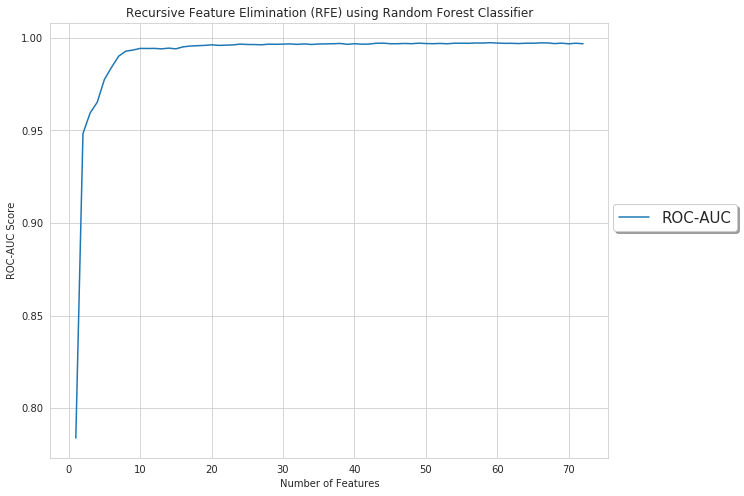

In [19]:
incremental_plot_auc(1,73, title)

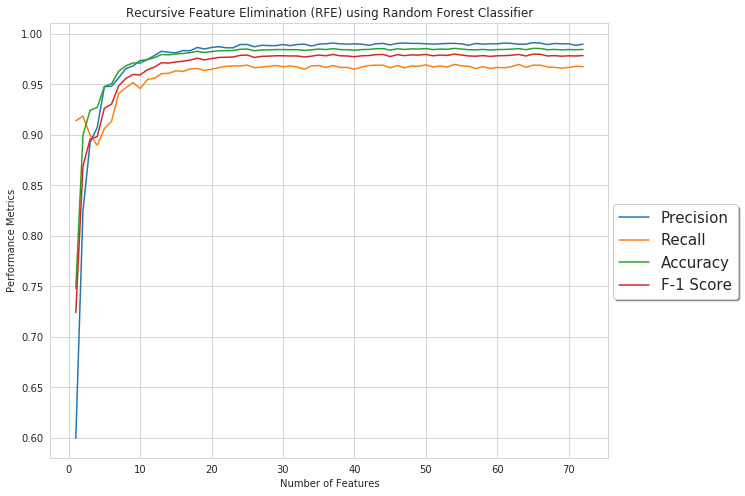

In [20]:
incremental_plot(1,73, title)


In [105]:
#best RFE(Gradient BoostingClassifier) features
clear_metrics()
for index in range(1, 115):
    sel = RFE(GradientBoostingClassifier(n_estimators=100, random_state=0), n_features_to_select = index)
    sel.fit(X_train,y_train)
    X_optimal_gradient = sel.transform(X_validate)
    print(X_optimal_gradient.shape)
    print('Selected Feature: ', index)
    run_randomForest(X_optimal_gradient,y_validate, index)

(7518, 1)
Selected Feature:  1
Classification Report for Random Forest:    1
Accuracy: 0.7998   (+/- 0.0216)
Precision: 0.8424   (+/- 0.0216)
Recall: 0.5496   (+/- 0.0216)
F-1 Score: 0.6648   (+/- 0.0216)
ROC-AUC: 0.7456   (+/- 0.0216)
(7518, 2)
Selected Feature:  2
Classification Report for Random Forest:    2
Accuracy: 0.8203   (+/- 0.0226)
Precision: 0.9671   (+/- 0.0226)
Recall: 0.5210   (+/- 0.0226)
F-1 Score: 0.6768   (+/- 0.0226)
ROC-AUC: 0.8226   (+/- 0.0226)
(7518, 3)
Selected Feature:  3
Classification Report for Random Forest:    3
Accuracy: 0.8172   (+/- 0.0248)
Precision: 0.9381   (+/- 0.0248)
Recall: 0.5511   (+/- 0.0248)
F-1 Score: 0.6822   (+/- 0.0248)
ROC-AUC: 0.8998   (+/- 0.0248)
(7518, 4)
Selected Feature:  4
Classification Report for Random Forest:    4
Accuracy: 0.8557   (+/- 0.0155)
Precision: 0.9406   (+/- 0.0155)
Recall: 0.6419   (+/- 0.0155)
F-1 Score: 0.7627   (+/- 0.0155)
ROC-AUC: 0.9202   (+/- 0.0155)
(7518, 5)
Selected Feature:  5
Classification Report for

(7518, 36)
Selected Feature:  36
Classification Report for Random Forest:    36
Accuracy: 0.9421   (+/- 0.0246)
Precision: 0.9431   (+/- 0.0246)
Recall: 0.8949   (+/- 0.0246)
F-1 Score: 0.9180   (+/- 0.0246)
ROC-AUC: 0.9824   (+/- 0.0246)
(7518, 37)
Selected Feature:  37
Classification Report for Random Forest:    37
Accuracy: 0.9408   (+/- 0.0178)
Precision: 0.9388   (+/- 0.0178)
Recall: 0.8952   (+/- 0.0178)
F-1 Score: 0.9162   (+/- 0.0178)
ROC-AUC: 0.9828   (+/- 0.0178)
(7518, 38)
Selected Feature:  38
Classification Report for Random Forest:    38
Accuracy: 0.9401   (+/- 0.0193)
Precision: 0.9402   (+/- 0.0193)
Recall: 0.8919   (+/- 0.0193)
F-1 Score: 0.9151   (+/- 0.0193)
ROC-AUC: 0.9825   (+/- 0.0193)
(7518, 39)
Selected Feature:  39
Classification Report for Random Forest:    39
Accuracy: 0.9479   (+/- 0.0190)
Precision: 0.9532   (+/- 0.0190)
Recall: 0.9004   (+/- 0.0190)
F-1 Score: 0.9259   (+/- 0.0190)
ROC-AUC: 0.9837   (+/- 0.0190)
(7518, 40)
Selected Feature:  40
Classificat

(7518, 71)
Selected Feature:  71
Classification Report for Random Forest:    71
Accuracy: 0.9606   (+/- 0.0144)
Precision: 0.9651   (+/- 0.0144)
Recall: 0.9246   (+/- 0.0144)
F-1 Score: 0.9444   (+/- 0.0144)
ROC-AUC: 0.9863   (+/- 0.0144)
(7518, 72)
Selected Feature:  72
Classification Report for Random Forest:    72
Accuracy: 0.9612   (+/- 0.0143)
Precision: 0.9670   (+/- 0.0143)
Recall: 0.9243   (+/- 0.0143)
F-1 Score: 0.9451   (+/- 0.0143)
ROC-AUC: 0.9865   (+/- 0.0143)
(7518, 73)
Selected Feature:  73
Classification Report for Random Forest:    73
Accuracy: 0.9605   (+/- 0.0147)
Precision: 0.9659   (+/- 0.0147)
Recall: 0.9235   (+/- 0.0147)
F-1 Score: 0.9441   (+/- 0.0147)
ROC-AUC: 0.9865   (+/- 0.0147)
(7518, 74)
Selected Feature:  74
Classification Report for Random Forest:    74
Accuracy: 0.9602   (+/- 0.0143)
Precision: 0.9640   (+/- 0.0143)
Recall: 0.9246   (+/- 0.0143)
F-1 Score: 0.9438   (+/- 0.0143)
ROC-AUC: 0.9868   (+/- 0.0143)
(7518, 75)
Selected Feature:  75
Classificat

(7518, 106)
Selected Feature:  106
Classification Report for Random Forest:    106
Accuracy: 0.9601   (+/- 0.0139)
Precision: 0.9640   (+/- 0.0139)
Recall: 0.9243   (+/- 0.0139)
F-1 Score: 0.9436   (+/- 0.0139)
ROC-AUC: 0.9872   (+/- 0.0139)
(7518, 107)
Selected Feature:  107
Classification Report for Random Forest:    107
Accuracy: 0.9605   (+/- 0.0142)
Precision: 0.9658   (+/- 0.0142)
Recall: 0.9235   (+/- 0.0142)
F-1 Score: 0.9441   (+/- 0.0142)
ROC-AUC: 0.9873   (+/- 0.0142)
(7518, 108)
Selected Feature:  108
Classification Report for Random Forest:    108
Accuracy: 0.9614   (+/- 0.0133)
Precision: 0.9674   (+/- 0.0133)
Recall: 0.9246   (+/- 0.0133)
F-1 Score: 0.9454   (+/- 0.0133)
ROC-AUC: 0.9872   (+/- 0.0133)
(7518, 109)
Selected Feature:  109
Classification Report for Random Forest:    109
Accuracy: 0.9593   (+/- 0.0129)
Precision: 0.9643   (+/- 0.0129)
Recall: 0.9217   (+/- 0.0129)
F-1 Score: 0.9424   (+/- 0.0129)
ROC-AUC: 0.9870   (+/- 0.0129)
(7518, 110)
Selected Feature:  1

In [106]:
title = "Recursive Feature Elimination (RFE) using Gradient Boosting Classifier"
results_to_csv(title)

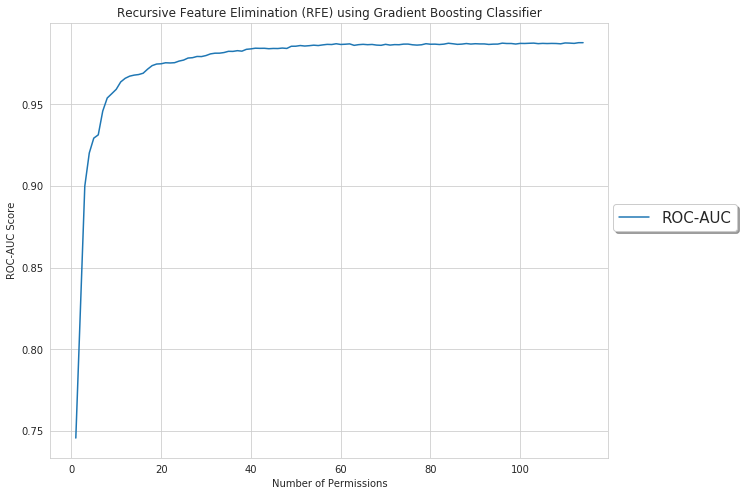

In [107]:
incremental_plot_auc(1,115, title)

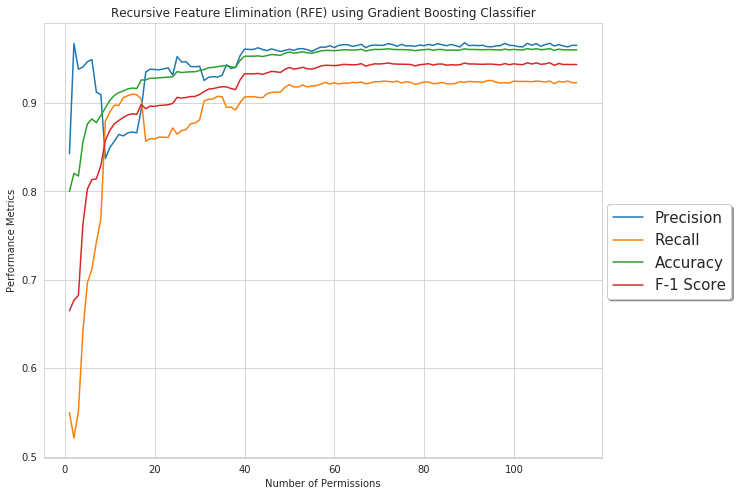

In [108]:
incremental_plot(1,115, title)


# Classifiers Evaluation

## For All Features

In [83]:
start = time.time()
run_svm(X_all, y_all)
end = time.time()
print(end - start)

ValueError: X.shape[0] should be equal to X.shape[1]

In [34]:
start = time.time()
run_randomForest(X_all, y_all)
end = time.time()
print(end - start)

Classification Report for Random Forest:    0
Accuracy: 0.9891   (+/- 0.0055)
Precision: 0.9931   (+/- 0.0055)
Recall: 0.9773   (+/- 0.0055)
F-1 Score: 0.9851   (+/- 0.0055)
ROC-AUC: 0.9988   (+/- 0.0055)
7.318322658538818


In [109]:
%%time
run_randomForest(X_all, y_all)

Classification Report for Random Forest:    0
Accuracy: 0.9891   (+/- 0.0055)
Precision: 0.9931   (+/- 0.0055)
Recall: 0.9773   (+/- 0.0055)
F-1 Score: 0.9851   (+/- 0.0055)
ROC-AUC: 0.9988   (+/- 0.0055)
CPU times: user 76.1 ms, sys: 68.2 ms, total: 144 ms
Wall time: 9 s


## For All Permissions

In [35]:
start = time.time()
run_randomForest(X_permissions, y_all)
end = time.time()
print(end - start)

Classification Report for Random Forest:    0
Accuracy: 0.9648   (+/- 0.0056)
Precision: 0.9703   (+/- 0.0056)
Recall: 0.9333   (+/- 0.0056)
F-1 Score: 0.9514   (+/- 0.0056)
ROC-AUC: 0.9911   (+/- 0.0056)
7.59743332862854


In [17]:
%%time
run_randomForest(X_permissions, y_all)

Classification Report for Random Forest:    0
Accuracy: 0.9648   (+/- 0.0056)
Precision: 0.9703   (+/- 0.0056)
Recall: 0.9333   (+/- 0.0056)
F-1 Score: 0.9514   (+/- 0.0056)
ROC-AUC: 0.9911   (+/- 0.0056)
CPU times: user 54.8 ms, sys: 41.5 ms, total: 96.3 ms
Wall time: 8.4 s


## For All API Calls

In [33]:
start = time.time()
run_randomForest(X_apis, y_all)
end = time.time()
print(end - start)

Classification Report for Random Forest:    0
Accuracy: 0.9808   (+/- 0.0076)
Precision: 0.9862   (+/- 0.0076)
Recall: 0.9617   (+/- 0.0076)
F-1 Score: 0.9738   (+/- 0.0076)
ROC-AUC: 0.9963   (+/- 0.0076)
5.439223051071167


In [50]:
%%time
run_randomForest(X_apis, y_all)

Classification Report for Random Forest:    0
Accuracy: 0.9808   (+/- 0.0076)
Precision: 0.9862   (+/- 0.0076)
Recall: 0.9617   (+/- 0.0076)
F-1 Score: 0.9738   (+/- 0.0076)
ROC-AUC: 0.9963   (+/- 0.0076)
CPU times: user 66.3 ms, sys: 7.84 ms, total: 74.2 ms
Wall time: 6.31 s


## Recursive Feature Elimination (RFE) using Random Forest Classifier

### Significant Features Identification

In [23]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_all, y_all, test_size = 0.5, random_state = 0)


In [36]:
import time

clear_metrics()
#X_top_feat_imps
for index in range(35,40,1):
    sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select=index)
    sel.fit(X_train, y_train)
    X_transform = sel.transform(X_validate)
    print(X_transform.shape)
    print('Selected Feature: ', index)
    start = time.time()
    run_randomForest(X_transform, y_validate, index)
    end = time.time()
    print(end - start)

(7518, 35)
Selected Feature:  35
Classification Report for Random Forest:    35
Accuracy: 0.9546   (+/- 0.0183)
Precision: 0.9616   (+/- 0.0183)
Recall: 0.9110   (+/- 0.0183)
F-1 Score: 0.9355   (+/- 0.0183)
ROC-AUC: 0.9844   (+/- 0.0183)
3.5134849548339844
(7518, 36)
Selected Feature:  36
Classification Report for Random Forest:    36
Accuracy: 0.9572   (+/- 0.0157)
Precision: 0.9609   (+/- 0.0157)
Recall: 0.9191   (+/- 0.0157)
F-1 Score: 0.9394   (+/- 0.0157)
ROC-AUC: 0.9839   (+/- 0.0157)
3.5991153717041016
(7518, 37)
Selected Feature:  37
Classification Report for Random Forest:    37
Accuracy: 0.9574   (+/- 0.0144)
Precision: 0.9637   (+/- 0.0144)
Recall: 0.9169   (+/- 0.0144)
F-1 Score: 0.9396   (+/- 0.0144)
ROC-AUC: 0.9840   (+/- 0.0144)
3.658693790435791
(7518, 38)
Selected Feature:  38
Classification Report for Random Forest:    38
Accuracy: 0.9584   (+/- 0.0156)
Precision: 0.9628   (+/- 0.0156)
Recall: 0.9206   (+/- 0.0156)
F-1 Score: 0.9411   (+/- 0.0156)
ROC-AUC: 0.9842   (

In [37]:
title = "RFE using Random Forest Classifier: 35 to 40 Permissions"
results_to_csv(title)

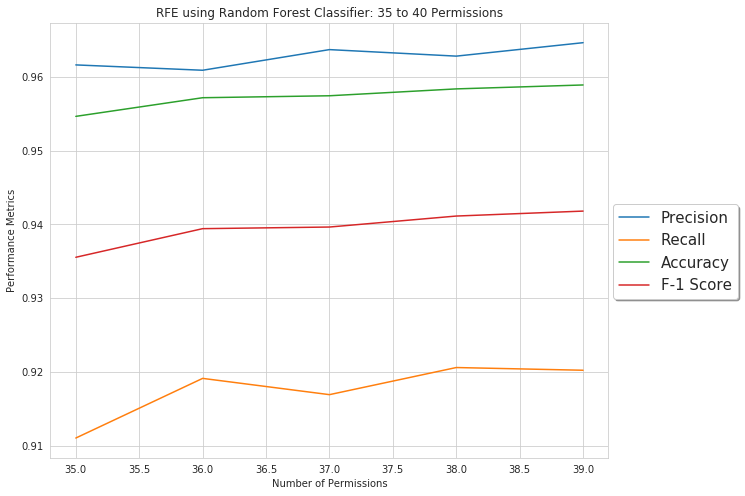

In [38]:
incremental_plot(35,40,title)

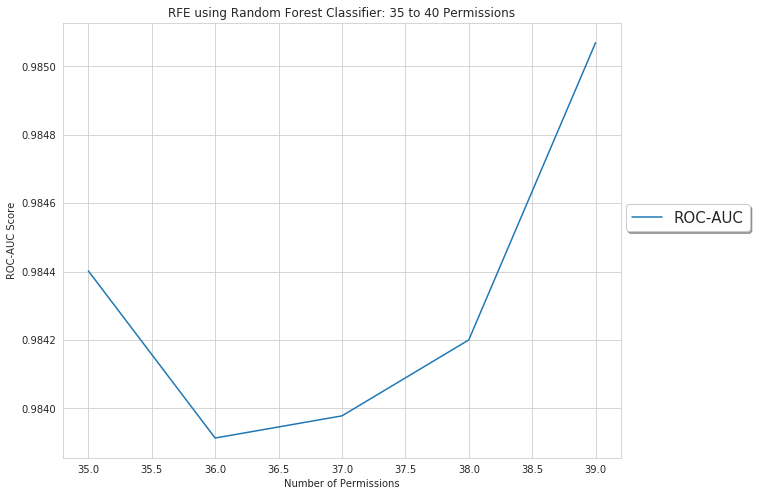

In [39]:
incremental_plot_auc(35,40,title)

In [25]:
clear_metrics()
index = 60

In [27]:
%%time
sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, 
                    n_jobs=-1), n_features_to_select=index)
    
sel.fit(X_train,y_train)
X_optimal_features = sel.transform(X_all)
print(X_optimal_features.shape)

(15036, 60)
CPU times: user 2min 28s, sys: 3.92 s, total: 2min 32s
Wall time: 1min 24s


In [28]:
%%time
#print('Selected Feature: ', index)
run_randomForest(X_optimal_features,y_all, index)

Classification Report for Random Forest:    60
Accuracy: 0.9870   (+/- 0.0078)
Precision: 0.9893   (+/- 0.0078)
Recall: 0.9755   (+/- 0.0078)
F-1 Score: 0.9823   (+/- 0.0078)
ROC-AUC: 0.9983   (+/- 0.0078)
CPU times: user 47 ms, sys: 52.7 ms, total: 99.7 ms
Wall time: 6.24 s


### Significant Permissions Identification

In [23]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_permissions, y_all, test_size = 0.5, random_state = 0)


In [36]:
import time

clear_metrics()
#X_top_feat_imps
for index in range(35,40,1):
    sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select=index)
    sel.fit(X_train, y_train)
    X_transform = sel.transform(X_validate)
    print(X_transform.shape)
    print('Selected Feature: ', index)
    start = time.time()
    run_randomForest(X_transform, y_validate, index)
    end = time.time()
    print(end - start)

(7518, 35)
Selected Feature:  35
Classification Report for Random Forest:    35
Accuracy: 0.9546   (+/- 0.0183)
Precision: 0.9616   (+/- 0.0183)
Recall: 0.9110   (+/- 0.0183)
F-1 Score: 0.9355   (+/- 0.0183)
ROC-AUC: 0.9844   (+/- 0.0183)
3.5134849548339844
(7518, 36)
Selected Feature:  36
Classification Report for Random Forest:    36
Accuracy: 0.9572   (+/- 0.0157)
Precision: 0.9609   (+/- 0.0157)
Recall: 0.9191   (+/- 0.0157)
F-1 Score: 0.9394   (+/- 0.0157)
ROC-AUC: 0.9839   (+/- 0.0157)
3.5991153717041016
(7518, 37)
Selected Feature:  37
Classification Report for Random Forest:    37
Accuracy: 0.9574   (+/- 0.0144)
Precision: 0.9637   (+/- 0.0144)
Recall: 0.9169   (+/- 0.0144)
F-1 Score: 0.9396   (+/- 0.0144)
ROC-AUC: 0.9840   (+/- 0.0144)
3.658693790435791
(7518, 38)
Selected Feature:  38
Classification Report for Random Forest:    38
Accuracy: 0.9584   (+/- 0.0156)
Precision: 0.9628   (+/- 0.0156)
Recall: 0.9206   (+/- 0.0156)
F-1 Score: 0.9411   (+/- 0.0156)
ROC-AUC: 0.9842   (

In [37]:
title = "RFE using Random Forest Classifier: 35 to 40 Permissions"
results_to_csv(title)

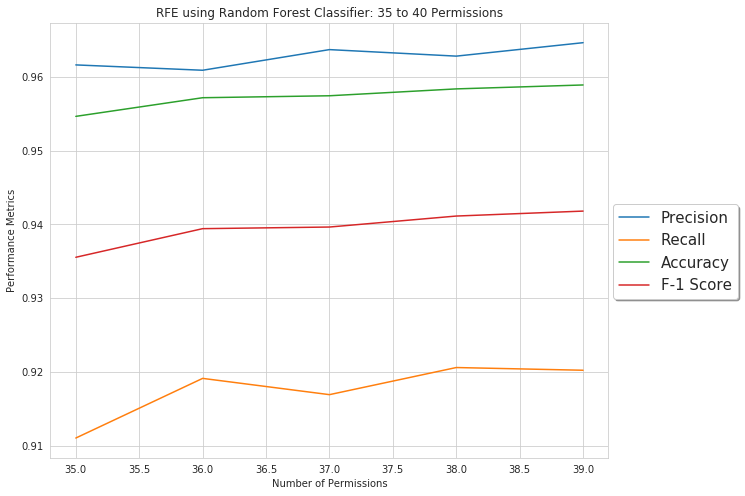

In [38]:
incremental_plot(35,40,title)

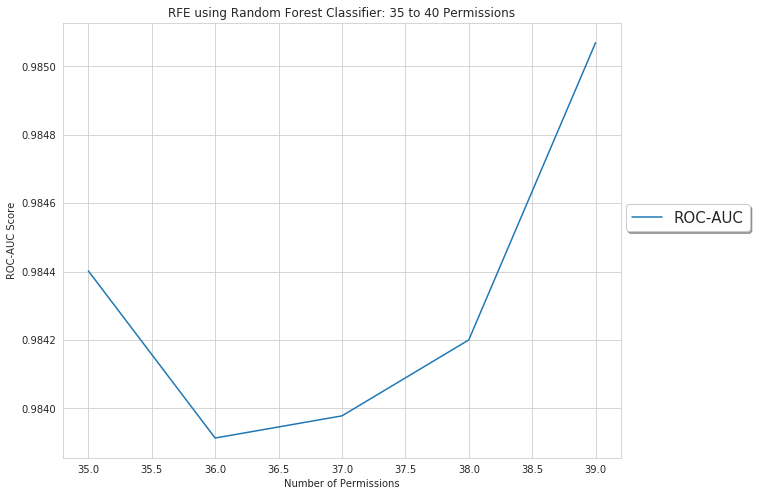

In [39]:
incremental_plot_auc(35,40,title)

In [27]:
%%time
sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, 
                    n_jobs=-1), n_features_to_select=index)
    
sel.fit(X_train,y_train)
X_optimal_permission = sel.transform(X_permissions)
print(X_optimal_permission.shape)

(15036, 36)
CPU times: user 1min 9s, sys: 1.9 s, total: 1min 11s
Wall time: 43 s


In [184]:
%%time
#print('Selected Feature: ', index)
run_randomForest(X_optimal_permission,y_all, index)

Classification Report for Random Forest:    38
Accuracy: 0.9616   (+/- 0.0081)
Precision: 0.9676   (+/- 0.0081)
Recall: 0.9272   (+/- 0.0081)
F-1 Score: 0.9469   (+/- 0.0081)
ROC-AUC: 0.9886   (+/- 0.0081)
CPU times: user 61.8 ms, sys: 93.2 ms, total: 155 ms
Wall time: 6.49 s


### Significant API Calls Identification

In [16]:
index =32

In [17]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_apis, y_all, test_size = 0.5, random_state = 0)


In [20]:
%%time
sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, 
                    n_jobs=-1), n_features_to_select=index)
    
sel.fit(X_train,y_train)
X_optimal_apis = sel.transform(X_apis)
print(X_optimal_apis.shape)

(15036, 32)
CPU times: user 27.9 s, sys: 1.11 s, total: 29 s
Wall time: 19 s


In [21]:
%%time
#print('Selected Feature: ', index)
run_randomForest(X_optimal_apis,y_all, index)

Classification Report for Random Forest:    32
Accuracy: 0.9745   (+/- 0.0068)
Precision: 0.9775   (+/- 0.0068)
Recall: 0.9529   (+/- 0.0068)
F-1 Score: 0.9650   (+/- 0.0068)
ROC-AUC: 0.9939   (+/- 0.0068)
CPU times: user 86.6 ms, sys: 61.3 ms, total: 148 ms
Wall time: 5.9 s


### Combining Significant Permissions and APIs 

In [159]:
X_optimal_permissions_apis = pd.concat([to_dataframe(X_optimal_permission),to_dataframe(X_optimal_apis)], axis = 1) #concatenate column
X_optimal_permissions_apis.shape

(15036, 38)
(15036, 32)


(15036, 70)

In [160]:
%%time
#print('Selected Feature: ', index)
run_randomForest(X_optimal_permissions_apis,y_apis, index)

Classification Report for Random Forest:    32
Accuracy: 0.9860   (+/- 0.0077)
Precision: 0.9885   (+/- 0.0077)
Recall: 0.9734   (+/- 0.0077)
F-1 Score: 0.9809   (+/- 0.0077)
ROC-AUC: 0.9982   (+/- 0.0077)
CPU times: user 73.6 ms, sys: 57 ms, total: 131 ms
Wall time: 7.11 s


### Correlation Based Elimination from Combined Significant Permissions and APIS

(15036, 64)


(15036, 64)

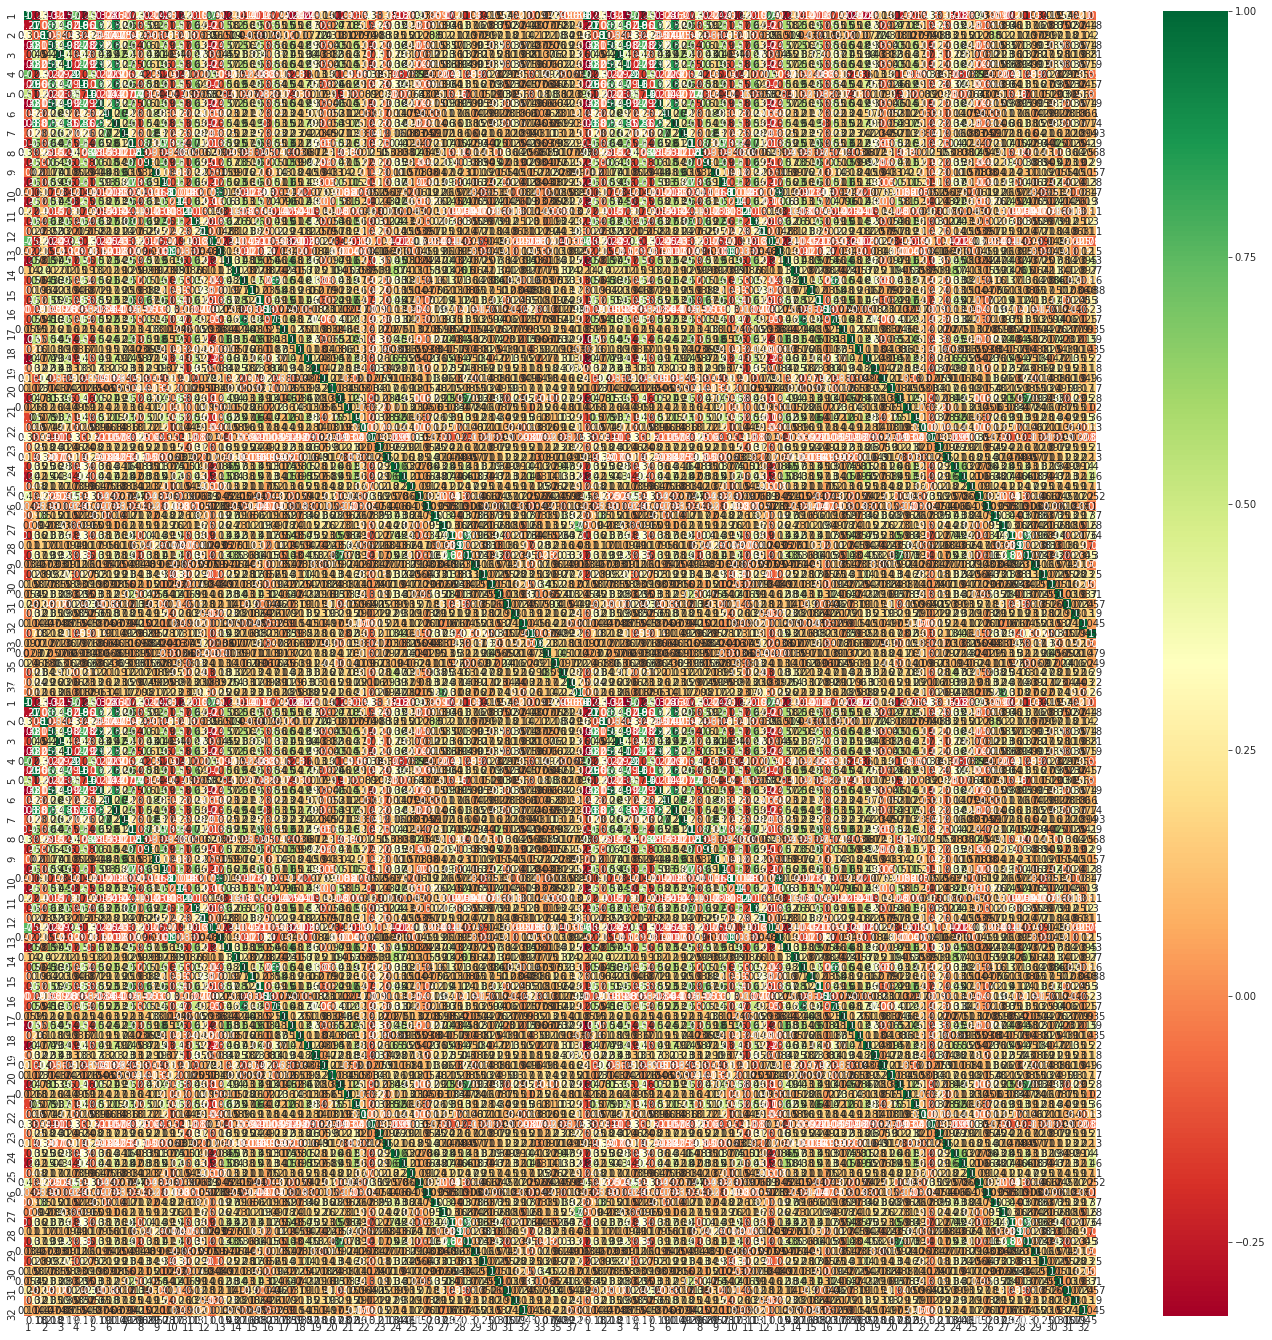

In [165]:
X_corr_optimal = grouped_correlated(X_optimal_permissions_apis)
X_corr_optimal.shape

In [168]:
%%time
#print('Selected Feature: ', index)
run_randomForest(X_corr_optimal,y_all, index)

Classification Report for Random Forest:    32
Accuracy: 0.9862   (+/- 0.0082)
Precision: 0.9889   (+/- 0.0082)
Recall: 0.9736   (+/- 0.0082)
F-1 Score: 0.9811   (+/- 0.0082)
ROC-AUC: 0.9983   (+/- 0.0082)
CPU times: user 86.4 ms, sys: 85.4 ms, total: 172 ms
Wall time: 7.06 s


### List of Significant APIs and Permissions

In [29]:
X_top_features = to_dataframe(X_optimal_features)
X_top_features

(15036, 60)


1   2   3   4   5   6   7   8   9   10  ...  51  52  53  54  55  56  \
1       0   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   1   0   
2       0   0   0   0   0   0   1   0   0   0  ...   1   0   0   0   1   0   
3       0   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   1   0   
4       0   0   0   0   0   0   0   0   0   1  ...   1   1   1   0   1   1   
5       0   0   0   0   0   0   0   0   0   0  ...   1   0   1   0   0   0   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..   
15032   1   1   1   1   1   1   0   1   1   1  ...   1   0   0   0   1   0   
15033   0   0   0   0   0   0   0   0   0   1  ...   0   0   0   0   0   0   
15034   0   0   0   0   0   0   0   0   0   0  ...   1   0   0   0   0   0   
15035   1   1   1   1   1   1   0   1   1   1  ...   1   1   1   0   1   0   
15036   1   1   1   1   1   1   0   1   1   1  ...   1   0   1   0   1   1   

       57  58  59  60  
1       0   0   1   0  
2       0   0   1   0  
3       1   0   0   0  
4       1   1   1   1  
5       1   1   0   1  
...    ..  ..  ..  ..  
15032   1   1   1   0  
15033   1   1   1   0  
15034   0   1   1   0  
15035   1   1   1   1  
15036   1   0   1   1  

[15036 rows x 60 columns]

In [30]:
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':sel.ranking_})
selected_rfe_features.sort_values(by='Ranking')

Feature  Ranking
0                            transact        1
35                 System.loadLibrary        1
38                          WRITE_SMS        1
39                 READ_SYNC_SETTINGS        1
41   android.telephony.gsm.SmsManager        1
..                                ...      ...
176                 BIND_TEXT_SERVICE      152
156                     Process.start      153
198                  BIND_VPN_SERVICE      154
124                READ_SOCIAL_STREAM      155
136               WRITE_SOCIAL_STREAM      156

[215 rows x 2 columns]

In [31]:
with open('top_drebin_features.csv', 'w') as f:
        writer = csv.writer(f)
        writer.writerow(['Feature','Ranking'])
        writer.writerows(zip(selected_rfe_features.Feature, selected_rfe_features.Ranking))